<p style="font-size:36px;text-align:center"> <b>Health Insurance Lead Prediction</b> </p>

# Table of contents

1. Problem Statement
2. Import Libraries and Data
3. Dataset Analysis
4. Exploratory Data Analysis
5. Data Preparation
    - Handling Missing Values
    - Handling Outliers
    - Feature Engineering - Encoding Categorical Features
6. Defining a baseline using a Random Model
    - Defining methods for modelling and evaluation
    - Random Model Evaluation
7. Model Building and Evaluation using Statistical Models
   - 7.1 KNN
   - 7.2 Multinomial Naive Bayes
   - 7.3 Gaussian Naive Bayes
   - 7.4 SVM
   - 7.5 Logistic Regression
   - 7.6 Random Forest
   - 7.7 XGBoost Classifier
   - 7.8 Light GBM Classifier
8. Summarizing Modelling Results - Selecting the Best Model
9. Improving the performance of the Best Model
   - 9.1 Feature Reduction
   - 9.2 Hyper Parameter Tuning

# **1. Problem Statement**


### **FinMan Health Insurance Lead Prediction:-**

Our client 'FinMan' is a financial services company that provides various financial services like loan, investment funds, insurance etc. to its customers. 'FinMan' wishes to cross-sell health insurance to the existing customers who may or may not hold insurance policies with the company. The company recommend health insurance to it's customers based on their profile once these customers land on the website. Customers might browse the recommended health insurance policy and consequently fill up a form to apply. When these customers fill-up the form, their Response towards the policy is considered positive and they are classified as a lead.

Once these leads are acquired, the sales advisors approach them to convert and thus the company can sell proposed health insurance to these leads in a more efficient manner.

**Problem :** The task is to build a model to predict whether the person will be interested in their proposed Health plan/policy.

**Data Source :**  Analytics Vidhya

# **2. Import Libraries and Read Data**

In [1]:
# Basic Libraries

import numpy as np
import pandas as pd
import re
import string
import random
import math
import time
import os
import itertools
import collections
from collections import Counter, defaultdict
import pickle
from tqdm import tqdm
import io

# Visualization

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
plt.style.use("seaborn-dark")

import seaborn as sns
#sns.set_style('whitegrid')
sns.set_style('darkgrid')

from plotly import tools
import plotly.express as px
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go



# Preprocessing

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.model_selection import StratifiedKFold, RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
import category_encoders as ce


# Models

from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgbm
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from xgboost import plot_importance


# Evaluation

from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import  accuracy_score, log_loss, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve


# Model Serialization

import pickle
import joblib


import warnings
warnings.filterwarnings(action = "ignore")

%matplotlib inline

#### 2.1 Read the train Data

In [2]:
train_df = pd.read_csv('train_Df64byy.csv')

In [3]:
# Check the shape of the train data
print("Shape of train data :",train_df.shape)

train_df.head()

Shape of train data : (50882, 14)


,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


#### 2.2 Data Description

Different Fields in train dataset are




# **3. Dataset Analysis**

#### **3.1 Data Features**

In [4]:
print("No. of features in the dataset :", len(train_df.columns), end ="\n\n")
print("Feature Names: ", train_df.columns.values)

No. of features in the dataset : 14

Feature Names:  ['ID' 'City_Code' 'Region_Code' 'Accomodation_Type' 'Reco_Insurance_Type'
 'Upper_Age' 'Lower_Age' 'Is_Spouse' 'Health Indicator'
 'Holding_Policy_Duration' 'Holding_Policy_Type' 'Reco_Policy_Cat'
 'Reco_Policy_Premium' 'Response']


#### **3.2 Check the missing values in the data**

In [5]:
# Check the missing values in the train data
train_df.isnull().sum()

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

In [6]:
# check the percentage of missing values in the train data
train_df.isnull().sum()/len(train_df)

ID                         0.000000
City_Code                  0.000000
Region_Code                0.000000
Accomodation_Type          0.000000
Reco_Insurance_Type        0.000000
Upper_Age                  0.000000
Lower_Age                  0.000000
Is_Spouse                  0.000000
Health Indicator           0.229767
Holding_Policy_Duration    0.397999
Holding_Policy_Type        0.397999
Reco_Policy_Cat            0.000000
Reco_Policy_Premium        0.000000
Response                   0.000000
dtype: float64

#### 3.3 Check the Datatypes of Features and Convert the 'object' types to 'category' types

In [7]:
#check the data types of features
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  object 
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  object 
 4   Reco_Insurance_Type      50882 non-null  object 
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  object 
 8   Health Indicator         39191 non-null  object 
 9   Holding_Policy_Duration  30631 non-null  object 
 10  Holding_Policy_Type      30631 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null  int64  
dtypes: float64(2), int64(6

In [8]:
# check the number of unique values in each feature. 
# this is a quick way to check the categorical features in the dataset.

train_df.nunique(axis=0)

ID                         50882
City_Code                     36
Region_Code                 5316
Accomodation_Type              2
Reco_Insurance_Type            2
Upper_Age                     58
Lower_Age                     60
Is_Spouse                      2
Health Indicator               9
Holding_Policy_Duration       15
Holding_Policy_Type            4
Reco_Policy_Cat               22
Reco_Policy_Premium         6977
Response                       2
dtype: int64

In [9]:
# convert the object type features to categorical types in train data

train_df[train_df.select_dtypes(include=np.object).columns.values] = train_df.select_dtypes(include=np.object).astype('category')
train_df.dtypes

ID                            int64
City_Code                  category
Region_Code                   int64
Accomodation_Type          category
Reco_Insurance_Type        category
Upper_Age                     int64
Lower_Age                     int64
Is_Spouse                  category
Health Indicator           category
Holding_Policy_Duration    category
Holding_Policy_Type         float64
Reco_Policy_Cat               int64
Reco_Policy_Premium         float64
Response                      int64
dtype: object

#### **Observations:**

- I have changed the datatypes of 'object' type columns to 'category' so as to improve the performance since a DataFrame with category data type is much faster for data manipulation.
- Also we can see that certain features like 'Holding_Policy_Type','Reco_Policy_Cat' and 'Region_Code' which actually contains categorical (or ordinal) data, but are displaying the data type as numerical. I will fix the datatypes of these features later in the data-preparation stage.

#### 3.4 Check the basic stats of the data

In [10]:
# Basic stats - train data numerical features
train_df.describe()

,ID,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
count,50882.000000,50882.000000,50882.000000,50882.000000,30631.000000,50882.000000,50882.000000,50882.000000
mean,25441.500000,1732.788707,44.856275,42.738866,2.439228,15.115188,14183.950069,0.239947
std,14688.512535,1424.081652,17.310271,17.319375,1.025923,6.340663,6590.074873,0.427055
min,1.000000,1.000000,18.000000,16.000000,1.000000,1.000000,2280.000000,0.000000
25%,12721.250000,523.000000,28.000000,27.000000,1.000000,12.000000,9248.000000,0.000000
50%,25441.500000,1391.000000,44.000000,40.000000,3.000000,17.000000,13178.000000,0.000000
75%,38161.750000,2667.000000,59.000000,57.000000,3.000000,20.000000,18096.000000,0.000000
max,50882.000000,6194.000000,75.000000,75.000000,4.000000,22.000000,43350.400000,1.000000


In [11]:
# Basic stats - train data categorical features
train_df.describe(exclude=np.number)

,City_Code,Accomodation_Type,Reco_Insurance_Type,Is_Spouse,Health Indicator,Holding_Policy_Duration
count,50882,50882,50882,50882,39191,30631
unique,36,2,2,2,9,15
top,C1,Owned,Individual,No,X1,1.0
freq,8973,27951,40536,42460,13010,4499


#### **Observations:**

- Dataset contains numeric, ordinal and categirical features.
- Presence of **missing values** is observed in the dataset with the **3 features : 'Health Indicator' (categorical), 'Holding_Policy_Duration' (categorical), 'Holding_Policy_Type' (ordinal)**.
- **'ID'** feature is simply a row id and can be neglected while model building.
- We can observe presence of some **outliers** for the feature 'Reco_Policy_Premium'.
- Most of the policy holders (precisely, **40536** in train data) holds an **'Individual'** type account with the company.
- We can see there are some policy accounts which are of type **'Joint'** where the actual policy holders are not married to each other.

# **4. Exploratory Data Analysis**

## **4.1 Univariate Analysis:**

Different types of variables in our dataset are Categorical, ordinal and numerical.

**Categorical features:** These features have categories (City_Code, Accomodation_Type, Reco_Insurance_Type, Is_Spouse, Health Indicator, Response)

**Ordinal features:** These are categorical features which are having some order involved (Holding_Policy_Type, Holding_Policy_Duration, Reco_Policy_Cat)

**Numerical features:** These features have numerical values (Region_Code, Upper_Age, Lower_Age, Reco_Policy_Premium)

#### **4.1.1 Analysis of the Categorical Target feature - 'Response'**

- 0 : Customer did not show interest in the recommended policy.
- 1 : Customer showed interest in the recommended policy.

In [ ]:
train_df['Response'].value_counts(normalize=False)

0    38673
1    12209
Name: Response, dtype: int64

In [ ]:
train_df['Response'].value_counts(normalize=True)

0    0.760053
1    0.239947
Name: Response, dtype: float64

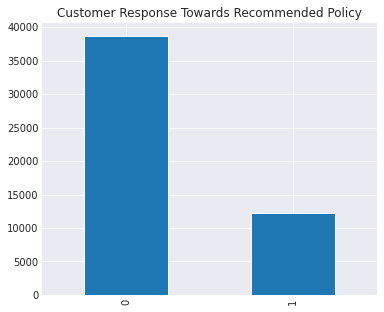

In [ ]:
train_df['Response'].value_counts().plot.bar(figsize=(6,5),title= 'Customer Response Towards Recommended Policy')

#### **Observations:**

- We can see that around **76%** customers did not shown interest in the recommended policy while the reamining **24%** were interested in the recommended policy.


### 4.1.2 Analysis of the Categorical features :- 
- Accomodation_Type
- Reco_Insurance_Type
- Is_Spouse
- City_Code
- Health Indicator

Owned     27951
Rented    22931
Name: Accomodation_Type, dtype: int64


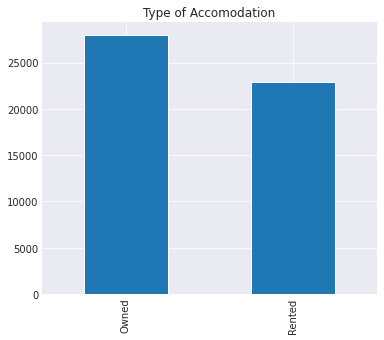

In [ ]:
print(train_df['Accomodation_Type'].value_counts(normalize=False))
train_df['Accomodation_Type'].value_counts().plot.bar(figsize=(6,5),title= 'Type of Accomodation')

Individual    40536
Joint         10346
Name: Reco_Insurance_Type, dtype: int64


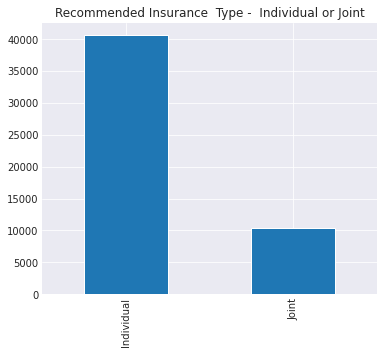

In [ ]:
print(train_df['Reco_Insurance_Type'].value_counts(normalize=False))
train_df['Reco_Insurance_Type'].value_counts().plot.bar(figsize=(6,5),title= 'Recommended Insurance  Type -  Individual or Joint')

No     42460
Yes     8422
Name: Is_Spouse, dtype: int64


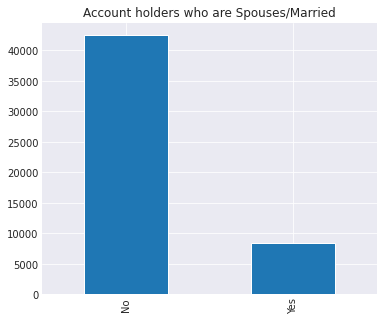

In [ ]:
print(train_df['Is_Spouse'].value_counts(normalize=False))
train_df['Is_Spouse'].value_counts().plot.bar(figsize=(6,5),title= 'Account holders who are Spouses/Married')

C1     8973
C10    1611
C11    1147
C12     868
C13    1005
C14     746
C15    1186
C16    1135
C17    1159
C18     797
C19     899
C2     7747
C20     926
C21     679
C22     516
C23     587
C24     553
C25     366
C26     499
C27     295
C28     285
C29     387
C3     4889
C30      58
C31      15
C32     160
C33     286
C34     130
C35      56
C36      36
C4     3671
C5     1364
C6     1950
C7     1910
C8     1806
C9     2185
Name: City_Code, dtype: int64


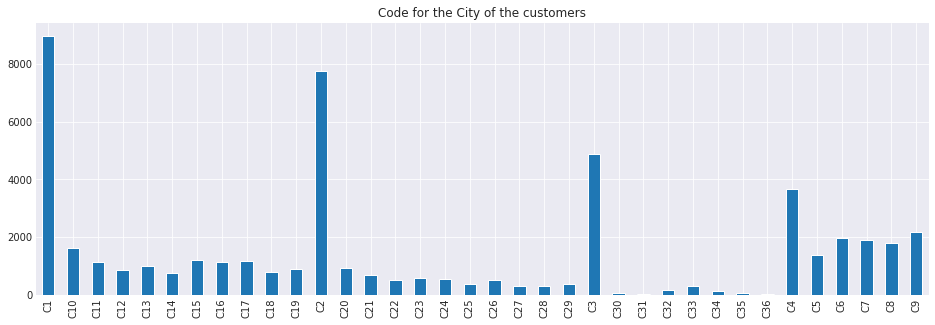

In [ ]:
print(train_df['City_Code'].value_counts(normalize=False).sort_index())
train_df['City_Code'].value_counts().sort_index().plot.bar(figsize=(16,5),title= 'Code for the City of the customers')

In [82]:
train_df[train_df[['Health Indicator']].isna().any(axis=1)]

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
6,7,C3,679,Owned,Individual,28,28,No,NaN,NaN,NaN,17,10640.0,0
9,10,C1,530,Owned,Joint,59,26,Yes,NaN,7.0,4.0,18,21100.8,1
12,13,C7,3453,Owned,Individual,66,66,No,NaN,1.0,2.0,20,17192.0,1
19,20,C20,973,Owned,Individual,27,27,No,NaN,NaN,NaN,4,8050.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50859,50860,C1,217,Owned,Individual,70,70,No,NaN,6.0,3.0,20,19448.0,0
50865,50866,C21,4915,Owned,Individual,74,74,No,NaN,NaN,NaN,14,19944.0,0
50869,50870,C11,1770,Rented,Individual,45,45,No,NaN,1.0,1.0,20,10944.0,0
50871,50872,C10,224,Rented,Individual,21,21,No,NaN,1.0,1.0,13,11840.0,0


In [74]:
train_df.shape[0] - 39191

11691

In [72]:
train_df['Health Indicator'].value_counts(normalize=False).values.sum()

39191

X1    13010
X2    10332
X3     6762
X4     5743
X5     1727
X6     1280
X7      196
X8       78
X9       63
Name: Health Indicator, dtype: int64


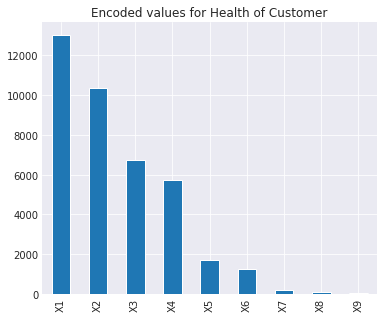

In [ ]:
print(train_df['Health Indicator'].value_counts(normalize=False))
train_df['Health Indicator'].value_counts().plot.bar(figsize=(6,5),title= 'Encoded values for Health of Customer')

### 4.1.3 Analysis of the Ordinal features :- 

- Holding_Policy_Type
- Holding_Policy_Duration
- Reco_Policy_Cat

3.0    13279
1.0     8173
2.0     5005
4.0     4174
Name: Holding_Policy_Type, dtype: int64


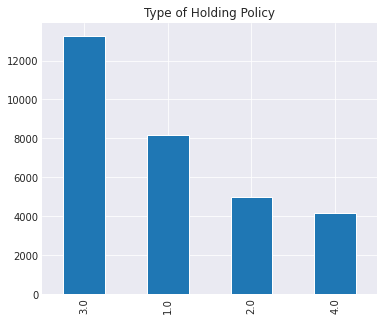

In [ ]:
print(train_df['Holding_Policy_Type'].value_counts(normalize=False))
train_df['Holding_Policy_Type'].value_counts().plot.bar(figsize=(6,5),title= 'Type of Holding Policy')

1.0     4499
10.0     813
11.0     546
12.0     513
13.0     511
14+     4335
14.0     466
2.0     4260
3.0     3586
4.0     2771
5.0     2362
6.0     1894
7.0     1645
8.0     1316
9.0     1114
Name: Holding_Policy_Duration, dtype: int64


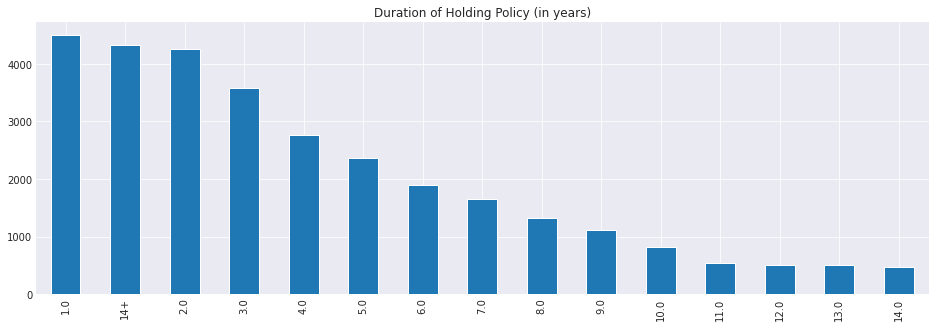

In [ ]:
print(train_df['Holding_Policy_Duration'].value_counts(normalize=False).sort_index())
train_df['Holding_Policy_Duration'].value_counts().plot.bar(figsize=(16,5),title= 'Duration of Holding Policy (in years)')

1     1967
2     1917
3     1059
4     1015
5     1007
6      851
7      834
8      776
9      789
10     770
11     781
12    2168
13    1684
14    1742
15    1615
16    4084
17    3756
18    5553
19    3708
20    3177
21    5027
22    6602
Name: Reco_Policy_Cat, dtype: int64


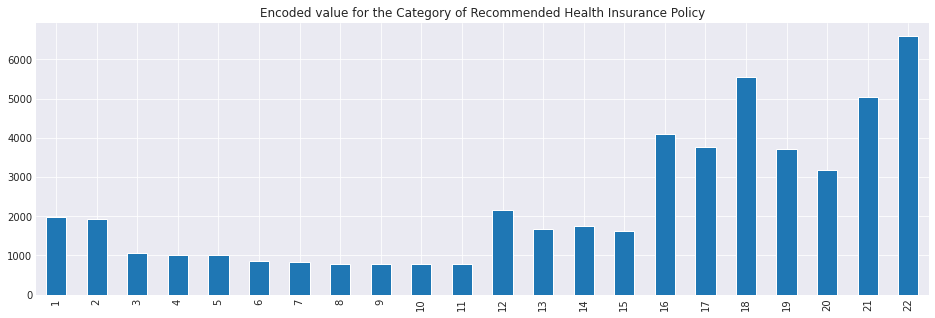

In [ ]:
print(train_df['Reco_Policy_Cat'].value_counts(normalize=False).sort_index())
train_df['Reco_Policy_Cat'].value_counts().sort_index().plot.bar(figsize=(16,5),title= 'Encoded value for the Category of Recommended Health Insurance Policy')

### 4.1.4 Analysis of the Numerical features :- 

- Region_Code 
- Upper_Age
- Lower_Age
- Reco_Policy_Premium

1       96
2       73
4       73
5       75
6       73
        ..
6188     1
6189     1
6191     1
6193     1
6194     1
Name: Region_Code, Length: 5316, dtype: int64


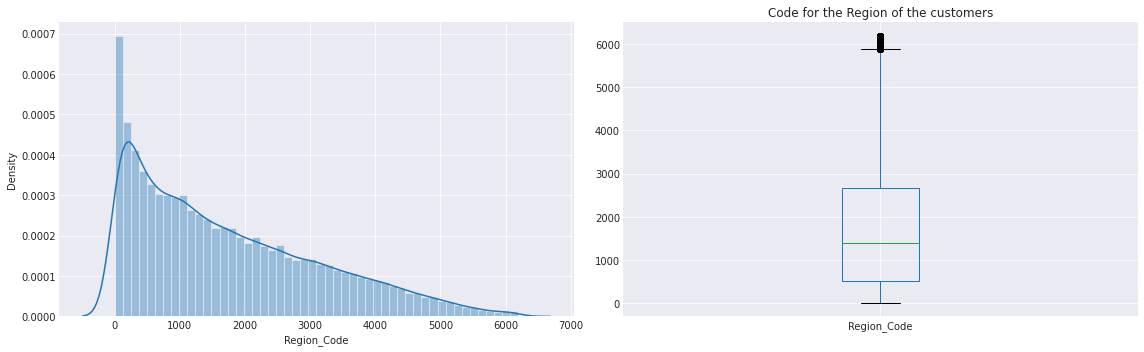

In [ ]:
print(train_df['Region_Code'].value_counts(normalize=False).sort_index())

plt.figure(figsize=(16,5))

plt.subplot(121) 
sns.distplot(train_df['Region_Code'],bins=50)

plt.subplot(122) 
train_df['Region_Code'].plot.box(title= 'Code for the Region of the customers')

plt.tight_layout()
plt.show()

#### **Observations:**
- The presence of right skewness in the plot cannot be attributed to the presence of outliers since these are the codes for the different regions which can be thought of like different localities in a city which are identified by zip codes.



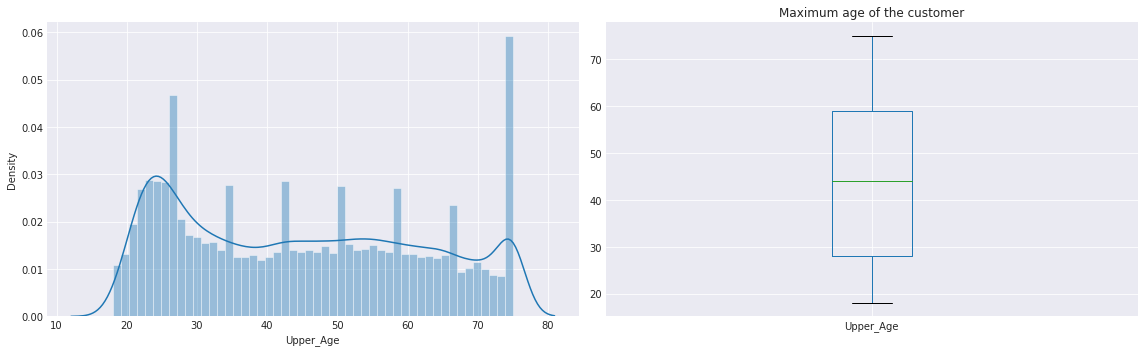

In [ ]:
#print(train_df['Upper_Age'].value_counts(normalize=False).sort_index())
#train_df['Upper_Age'].value_counts().plot.bar(figsize=(6,5),title= 'Maximum age of the customer')

plt.figure(figsize=(16,5))

plt.subplot(121) 
sns.distplot(train_df['Upper_Age'],bins=50)

plt.subplot(122) 
train_df['Upper_Age'].plot.box(title= 'Maximum age of the customer')

plt.tight_layout()
plt.show()

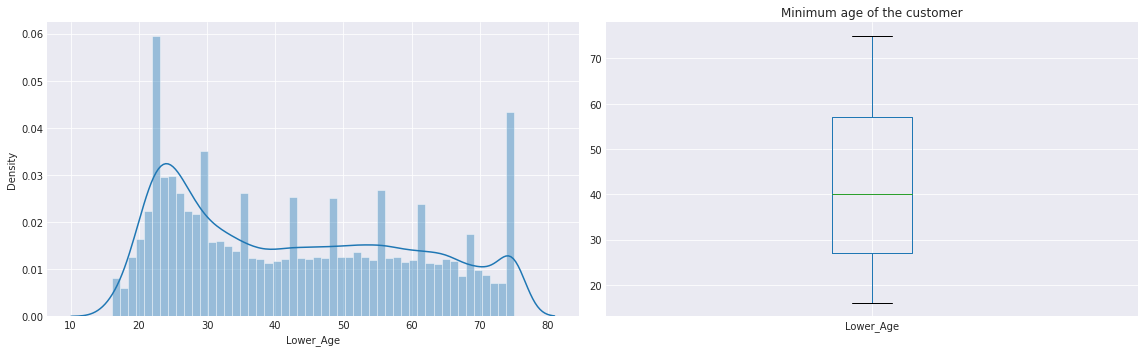

In [ ]:
#print(train_df['Lower_Age'].value_counts(normalize=False))
#train_df['Lower_Age'].value_counts().plot.bar(figsize=(6,5),title= 'Minimum age of the customer ')

plt.figure(figsize=(16,5))

plt.subplot(121) 
sns.distplot(train_df['Lower_Age'],bins=50)

plt.subplot(122) 
train_df['Lower_Age'].plot.box(title= 'Minimum age of the customer')

plt.tight_layout()
plt.show()

#### **Observations:**
- The 'upper' and 'lower' ages are simply the ages for the customers for whom the 'joint' policy is proposed.
- Both the upper and lower age values are same for the customers to whom 'individual' type policy is proposed.

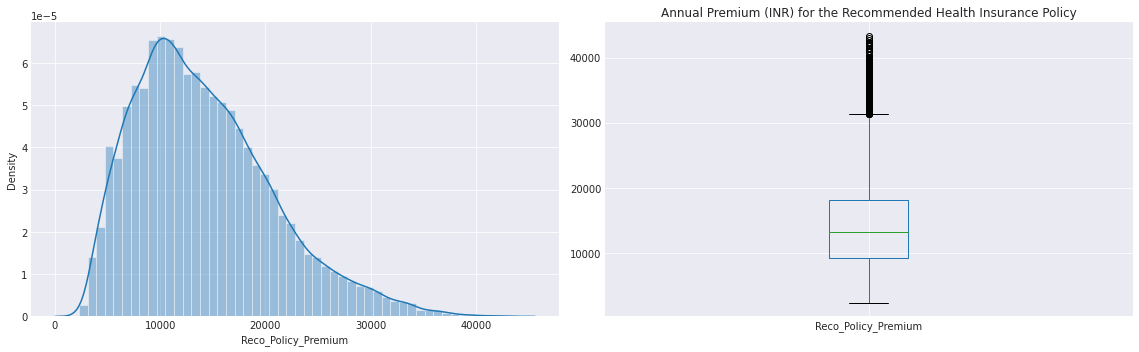

In [ ]:
#print(train_df['Reco_Policy_Premium'].value_counts(normalize=False))
#train_df['Reco_Policy_Premium'].value_counts().plot.bar(figsize=(6,5),title= 'Annual Premium (INR) for the Recommended Health Insurance Policy')

plt.figure(figsize=(16,5))

plt.subplot(121) 
sns.distplot(train_df['Reco_Policy_Premium'],bins=50)

plt.subplot(122) 
train_df['Reco_Policy_Premium'].plot.box(title= 'Annual Premium (INR) for the Recommended Health Insurance Policy')

plt.tight_layout()
plt.show()

#### **Observations:**
- The data distribution is right skewed which shows that there are customers for whom the proposed annual premium amount is higher than the average premium amount for the suggested policy.
- Here we can clearly observe presence of some outliers in the data, due to higher proposed premium amount.

### 4.2 Bivariate Analysis:

### 4.2.1 Analyzing the 'Reco_Insurance_Type' Vs the 'IS_Spouse' features

In [ ]:
print("No. of 'Joint' type policy account holders:", train_df[(train_df.Reco_Insurance_Type=="Joint")].shape[0])
print("\n",train_df[(train_df.Reco_Insurance_Type=="Joint")].groupby('Reco_Insurance_Type')['Is_Spouse'].value_counts())

No. of 'Joint' type policy account holders: 10346

 Reco_Insurance_Type  Is_Spouse
Joint                Yes          8422
                     No           1924
Name: Is_Spouse, dtype: int64


In [ ]:
print("No. of 'Individual' type policy account holders:", train_df[(train_df.Reco_Insurance_Type=="Individual")].shape[0])
print("\n",train_df[(train_df.Reco_Insurance_Type=="Individual")].groupby('Reco_Insurance_Type')['Is_Spouse'].value_counts())

No. of 'Individual' type policy account holders: 40536

 Reco_Insurance_Type  Is_Spouse
Individual           No           40536
Name: Is_Spouse, dtype: int64


#### **Observations:**

- Most of the policy holders (precisely, **40536**) holds an **'Individual'** type account with the company.
- We can see there are around **1924** policy accounts are of **'Joint'** type where the actual policy holders are not married to each other.

### 4.2.2 Analyzing the 'Reco_Insurance_Type' Vs the 'Lower_Age' and 'Upper_Age' features

In [ ]:
train_df[(train_df.Reco_Insurance_Type=="Individual")][['Reco_Insurance_Type','Lower_Age','Upper_Age']]

,Reco_Insurance_Type,Lower_Age,Upper_Age
0,Individual,36,36
2,Individual,32,32
4,Individual,44,44
5,Individual,52,52
6,Individual,28,28
...,...,...,...
50876,Individual,37,37
50877,Individual,22,22
50878,Individual,27,27
50879,Individual,63,63


In [ ]:
train_df[(train_df.Reco_Insurance_Type=="Individual") & (train_df.Lower_Age != train_df.Upper_Age) ][['Reco_Insurance_Type','Lower_Age','Upper_Age']]

,Reco_Insurance_Type,Lower_Age,Upper_Age


In [ ]:
train_df[(train_df.Reco_Insurance_Type=="Joint")][['Reco_Insurance_Type','Lower_Age','Upper_Age']]

,Reco_Insurance_Type,Lower_Age,Upper_Age
1,Joint,22,75
3,Joint,48,52
7,Joint,73,75
8,Joint,43,52
9,Joint,26,59
...,...,...,...
50834,Joint,64,75
50850,Joint,26,66
50855,Joint,58,70
50858,Joint,29,62


In [ ]:
train_df[(train_df.Reco_Insurance_Type=="Joint") & (train_df.Lower_Age == train_df.Upper_Age) ][['Reco_Insurance_Type','Lower_Age','Upper_Age']]

,Reco_Insurance_Type,Lower_Age,Upper_Age


#### **Observations:**

- Thus we can conclude that all the policy holders (precisely, **40536**) who had proposed an **'Individual'** type account, have the 'Lower_Age' and 'Upper_Age' values as same.
- We can also conclude that the 'Lower_Age' and 'Upper_Age' features represents the lower and upper ages for the joint account holders.
- Also not necessarily all the joint account holders are married/spouses.

### 4.2.3 Analyzing 'Accomodation_Type' Vs 'Response'

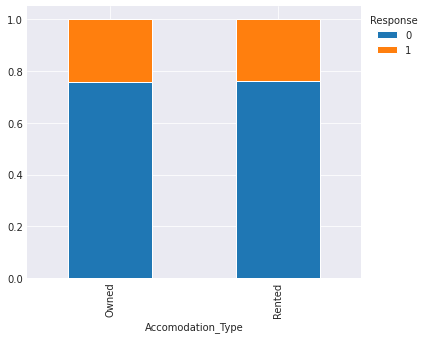

In [ ]:
Accomodation_Type = pd.crosstab(train_df['Accomodation_Type'],train_df['Response'])
Accomodation_Type.div(Accomodation_Type.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,5))
plt.legend(bbox_to_anchor =(1,1), loc='upper left',title='Response')
plt.show()

#### **Observations:**
- It can be inferred that the proportion of Owned and Rented accomodation types is more or less same for both lead and non-lead customers for the proposed policies.

### 4.2.4 Analyzing 'Reco_Insurance_Type' Vs 'Response'

In [ ]:
Reco_Insurance_Type = pd.crosstab(train_df['Reco_Insurance_Type'],train_df['Response'])
Reco_Insurance_Type

Response,0,1
Reco_Insurance_Type,,
Individual,30896,9640
Joint,7777,2569


In [ ]:
30896/(30896+9640) ,  9640/(30896+9640)

(0.7621866982435366, 0.2378133017564634)

In [ ]:
7777/(7777+2569) ,  7777/(30896+2569)

(0.7516914749661705, 0.2323920513969819)

In [ ]:
Reco_Insurance_Type.div(Reco_Insurance_Type.sum(1).astype(float), axis=0)

Response,0,1
Reco_Insurance_Type,,
Individual,0.762187,0.237813
Joint,0.751691,0.248309


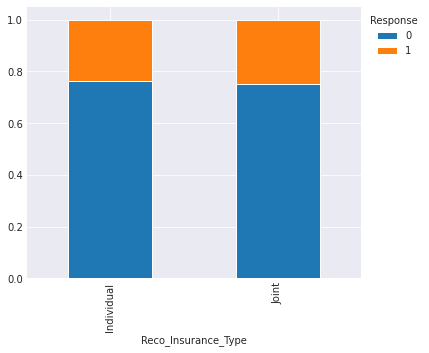

In [ ]:
Reco_Insurance_Type = pd.crosstab(train_df['Reco_Insurance_Type'],train_df['Response'])
Reco_Insurance_Type.div(Reco_Insurance_Type.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,5))
plt.legend(bbox_to_anchor =(1,1), loc='upper left',title='Response')
plt.show()

#### **Observations:**
- It can be inferred that the proportion of Individual and Joint account types is more or less same for both lead and non-lead customers  for the proposed policies.

### 4.2.5 Analyzing 'Is_Spouse' Vs 'Response'

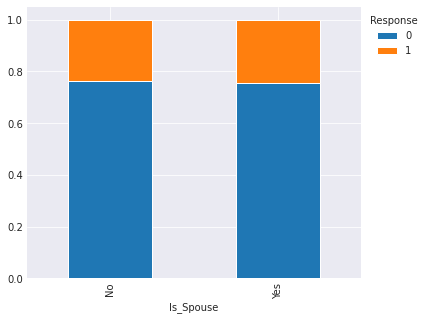

In [ ]:
Is_Spouse = pd.crosstab(train_df['Is_Spouse'],train_df['Response'])
Is_Spouse.div(Is_Spouse.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,5))
plt.legend(bbox_to_anchor =(1,1), loc='upper left',title='Response')
plt.show()

#### **Observations:**
- It can be inferred that the proportion of spouse and no-spouse customers is more or less same for both lead and non-lead customers for the proposed policies.

### 4.2.6 Analyzing 'Health_Indicator' Vs 'Response'

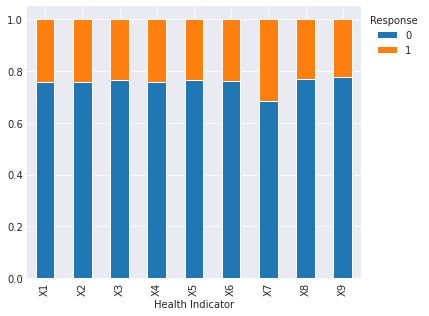

In [ ]:
Health_Indicator = pd.crosstab(train_df['Health Indicator'],train_df['Response'])
Health_Indicator.div(Health_Indicator.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,5))
plt.legend(bbox_to_anchor =(1,1), loc='upper left',title='Response')
plt.show()

#### **Observations:**
- It can be inferred that the customers with the encoded values of Health Indicator as X7 are more likely to be leads as compared to other Health type indicators.
- For all the customers, other than those fall in the X7 category, the proportion of Health Indicator is more or less same for both lead and non-lead customers.

### 4.2.7 Analyzing 'Holding_Policy_Type' Vs 'Response'

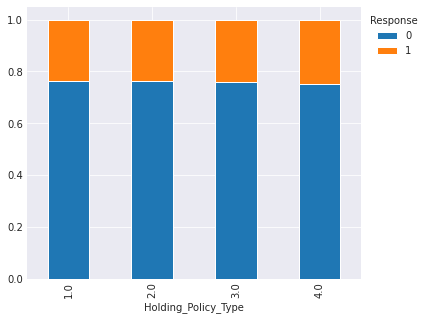

In [ ]:
Holding_Policy_Type = pd.crosstab(train_df['Holding_Policy_Type'],train_df['Response'])
Holding_Policy_Type.div(Holding_Policy_Type.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,5))
plt.legend(bbox_to_anchor =(1,1), loc='upper left',title='Response')
plt.show()

#### **Observations:**
- It can be inferred that the proportion of Holding policy type with category as 1.0 and 2.0 is more or less same for both lead and non-lead customers.
- It can be inferred that the proportion of Holding policy type with category as 3.0 and 4.0 is more or less same for both lead and non-lead customers.
- Also we can see that the customers with the Holding policy type with category as 3.0 and 4.0 are more likely to be leads as compared to the customers with the Holding policy type with category as 1.0 and 2.0.

### 4.2.8 Analyzing 'Reco_Policy_Premium' Vs 'Response'

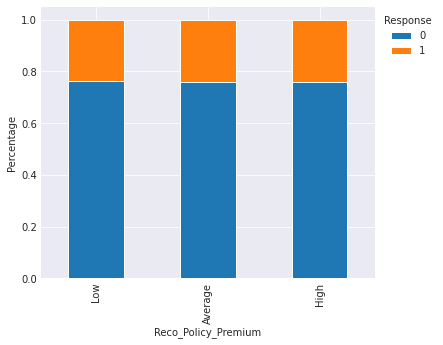

In [ ]:
bins=[0,9200,18000,43300]
groups=['Low','Average','High']
train_df['Reco_Policy_Premium_groups'] = pd.cut(x=train_df['Reco_Policy_Premium'],bins=bins,labels=groups)
RecoPolicyPremium_groups = pd.crosstab(index=train_df['Reco_Policy_Premium_groups'],columns=train_df['Response'])
RecoPolicyPremium_groups.div(RecoPolicyPremium_groups.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(6,5))
plt.legend(loc='upper left',bbox_to_anchor=(1,1),title='Response')
plt.xlabel('Reco_Policy_Premium')
plt.ylabel('Percentage')
plt.show()

In [ ]:
# we can now drop the bins created for the analysis

train_df=train_df.drop(labels=['Reco_Policy_Premium_groups'], axis=1)
train_df.columns.values

array(['ID', 'City_Code', 'Region_Code', 'Accomodation_Type',
       'Reco_Insurance_Type', 'Upper_Age', 'Lower_Age', 'Is_Spouse',
       'Health Indicator', 'Holding_Policy_Duration',
       'Holding_Policy_Type', 'Reco_Policy_Cat', 'Reco_Policy_Premium',
       'Response'], dtype=object)

#### **Observations:-**
- It can be inferred that the proportions of Policy Premium is almost equal for the Low, Average and High amounts.
- Thus we can say that a customer can be lead or non-lead independent of the Recommended Policy Premium amount.

### City Vs Region Code and Response

In [145]:
train_df.Region_Code.value_counts().sort_index()

1       96
2       73
4       73
5       75
6       73
        ..
6188     1
6189     1
6191     1
6193     1
6194     1
Name: Region_Code, Length: 5316, dtype: int64

In [109]:
dt13 = train_df.groupby(['Region_Code'])[['Response']].sum().reset_index(drop=False)
dt13

,Region_Code,Response
0,1,25
1,2,13
2,4,14
3,5,14
4,6,17
...,...,...
5311,6188,0
5312,6189,0
5313,6191,1
5314,6193,1


In [110]:
dt14 = train_df.groupby(['Region_Code'])[['Response']].size().reset_index(drop=False)
dt14

,Region_Code,0
0,1,96
1,2,73
2,4,73
3,5,75
4,6,73
...,...,...
5311,6188,1
5312,6189,1
5313,6191,1
5314,6193,1


In [107]:
dt1 = train_df.groupby(['City_Code','Region_Code'])[['Response']].sum().reset_index(drop=False)
#dt1
dt1[dt1.Response > 0]

,City_Code,Region_Code,Response
2,C1,4,14
3,C1,5,14
4,C1,6,17
6,C1,8,17
10,C1,15,15
...,...,...,...
190746,C9,5307,1
190893,C9,5477,1
190921,C9,5510,1
191193,C9,5909,1


In [56]:
dt2 = train_df.groupby(['City_Code','Region_Code'])[['Response']].size().reset_index(drop=False).rename(columns={0 : 'City_wise_region_count'})
#dt2
dt2[dt2.City_wise_region_count > 0]

,City_Code,Region_Code,City_wise_region_count
2,C1,4,73
3,C1,5,75
4,C1,6,73
6,C1,8,64
10,C1,15,54
...,...,...,...
191180,C9,5891,1
191193,C9,5909,1
191201,C9,5922,1
191303,C9,6092,1


### 4.3 Analyzing all the Numeric Features

- pairplot is used to visualize the pairwise relation between numeric features.

In [12]:
train_num_cols = ['Upper_Age','Lower_Age','Reco_Policy_Premium','Response']
##'Holding_Policy_Type','Reco_Policy_Cat'##

In [13]:
df_num = train_df[train_num_cols]

In [14]:
df_num.dtypes

Upper_Age                int64
Lower_Age                int64
Reco_Policy_Premium    float64
Response                 int64
dtype: object

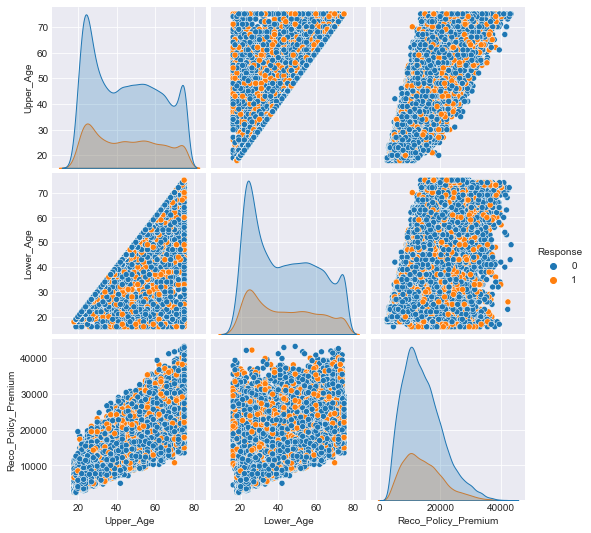

In [15]:
sns.pairplot(data=df_num,hue='Response',diag_kind='kde')

#### **Observations:-**
- We can observe some correlation exists between 'Reco_Policy_Premium' and 'Lowe_Age' and 'Upper_Age' features.

### 4.4 Correlation between all the Numeric features

- Heatmap is used to visualize the correlation.

In [16]:
train_df.corr()

,ID,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
ID,1.000000,-0.000465,-0.001725,0.001101,0.006649,-0.002235,-0.002350,0.005159
Region_Code,-0.000465,1.000000,-0.005649,-0.005928,0.011599,-0.065120,-0.010797,0.001121
Upper_Age,-0.001725,-0.005649,1.000000,0.921392,0.141890,0.025257,0.792689,0.002772
Lower_Age,0.001101,-0.005928,0.921392,1.000000,0.118028,0.021163,0.615739,-0.002099
Holding_Policy_Type,0.006649,0.011599,0.141890,0.118028,1.000000,0.079678,0.121342,0.009297
Reco_Policy_Cat,-0.002235,-0.065120,0.025257,0.021163,0.079678,1.000000,0.060989,0.114321
Reco_Policy_Premium,-0.002350,-0.010797,0.792689,0.615739,0.121342,0.060989,1.000000,0.007943
Response,0.005159,0.001121,0.002772,-0.002099,0.009297,0.114321,0.007943,1.000000


<AxesSubplot:>

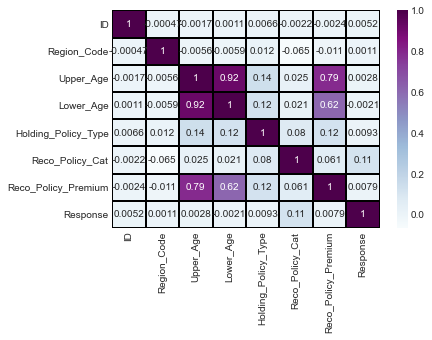

In [17]:
sns.heatmap(data=train_df.corr(), square=False, cmap='BuPu', annot=True, linewidths=1, linecolor='black')

#### **Observations:-**
- It can be observed that there exists strong correlation between 'Reco_Policy_Premium' and 'Lowe_Age' and 'Upper_Age' features.
- We can also see that 'Response' is loosely related to 'Reco_Policy_Cat'.

# 5. Data Preparation

### 5.1 Defining Methods for Data Preprocessing:

In [18]:
# this is a class for data preparation before performing statistical modelling

class Data_Preprocessor:
    
    @staticmethod
    def Log_transform(df, feature, bins = 30):
        """
        this is a method for log transformation of features for handling outliers.
        'log1p' takes care of '0' values, since the log(0) of undefined.
        """
        df[feature] = np.log1p(df[feature]) 
        df[feature].hist(bins=bins, color='b', alpha=0.3,figsize=(8,8))
    
    
    @staticmethod
    def get_response_coded_feature_dict(train_df, cat_feat_name, target_feat_name, feature_value_count, alpha, target_label_iterator):
        """
        this function return a dictionary mapping for each unique category in a categorical feature
        where the key will be the category name and value will be the probability scores for that category
        """
        
        #create a dictionary to store the probability score corresponding to each unique feature value.
        feature_dict = dict()

        # fea_count_total will contain the number of time a particular feature category (cat) occured in train data.
        for cat, cat_feat_count_total in feature_value_count.items():

            # vec will contain probability [ P(yi==k/xi==cat) ] of features belonging to a particular class 'k'. 
            # vec is a (1* class_labels) dim vector.
            vec = []

            for k in target_label_iterator:
                df_temp = train_df.loc[(train_df[target_feat_name]==k) & (train_df[cat_feat_name] == cat)]

                # df_temp.shape[0](numerator) will contain the no. of time a particular feature 
                # corrsponding to class 'k' occured in the train data.
                vec.append((df_temp.shape[0] + 10*alpha)/(cat_feat_count_total + len(target_label_iterator)*10*alpha))

            # update the dictionary with each category of feature as key and probability scores vector as value.
            feature_dict[cat] = vec

        return feature_dict


    @staticmethod
    def get_response_coded_feature_df(train_df, test_df, cat_feat_name, target_feat_name, alpha = 1, target_label_iterator = [0,1]):
        """
        this function returns the target encoded dataframe with new cols for each class label for the categorical feature.
         
        'train_df' : dataframe on which the data will be trained.
        
        'test_df' : dataframe other than train for which the categorical features will be encoded. For encoding
         training set features this parameter should be set to training dataframe name (i.e. 'train_df').
         
        'cat_feat_name' : name of the categorical feature for which the target encoding is being applied.
        
        'target_feat_name' : name of the target feature which is used for the target encoding.
        
        'alpha' : laplace_smoothing parameter. Handles the feature values in 'test_df' dataframe which are missing in 'train_df'.
        For example, (numerator + 10*alpha) / (denominator + num_class*10*alpha)
        
        'target_label_iterator': list of actual target class labels(default for binary). For multi-class, input the actual 
         class labels as a list. For example, for multi_class if actual class labels are numbers like (1,2,3) then iterator should be a list as [1,2,3].
        """
        
        try:
            # find the unique features and their value_count in the train data.
            feature_value_count = train_df[cat_feat_name].value_counts()

            # get the probability_scores vector for each feature_name in the train dataframe.
            feature_dict_train = Data_Preprocessor.get_response_coded_feature_dict(train_df, cat_feat_name, target_feat_name, feature_value_count, alpha, target_label_iterator)

            # feature_prob_dict will hold the 'feat_cat_name:probability_score' pair for each feature name in the test_df.
            feature_prob_dict = dict()

            # for every feature value in the given test_df, check if it is present in the train data (train_df),
            # if yes then append the probability_score corresponding to that feature_name in the feature_prob_dict
            # else append the laplace smoothed values ([(10*alpha)/(len(target_label_iterator)*10*alpha))]) in the feature_prob_dict.
            for index, row in test_df.iterrows():
                if row[cat_feat_name] in feature_value_count.keys():
                    feature_prob_dict[row[cat_feat_name]] = feature_dict_train[row[cat_feat_name]]
                else:
                    value = (10*alpha)/(len(target_label_iterator)*10*alpha)
                    feature_prob_dict[row[cat_feat_name]] = list([value]*len(target_label_iterator))

            # map the values in 'feat_cat_name:probability_score' pair dict to test_df categorical feature values
            test_df['temp_col'] = test_df[cat_feat_name].map(feature_prob_dict)

            # split the probability_scores into seperate columns as per each class label 
            encoded_col_names = [cat_feat_name + "_" + str(i) for i in target_label_iterator]
            test_df[encoded_col_names] = pd.DataFrame(test_df['temp_col'].to_list(), index= test_df.index)
            test_df.drop(labels='temp_col',axis=1,inplace=True)
            return test_df
        
        except TypeError:
            pass
                
        except:
            pass
    
    
# Creating an instnace of the class
Cls_Prepro = Data_Preprocessor

### 5.2 Create a copy of train dataset before data preparation:

In [19]:
train_new = train_df.copy(deep=True)

### 5.3 Handling Ordinal value like 14+ with the feature 'Holding_Policy_Duration':

- We will change the values '14+' in 'Holding_Policy_Duration' feature to '15.0' to make it a numerical variable. 

In [20]:
train_new['Holding_Policy_Duration'].value_counts().sort_index()

1.0     4499
10.0     813
11.0     546
12.0     513
13.0     511
14+     4335
14.0     466
2.0     4260
3.0     3586
4.0     2771
5.0     2362
6.0     1894
7.0     1645
8.0     1316
9.0     1114
Name: Holding_Policy_Duration, dtype: int64

In [21]:
train_new['Holding_Policy_Duration'].replace('14+', '15.0', inplace=True)

In [22]:
train_new['Holding_Policy_Duration'].value_counts().sort_index()

1.0     4499
10.0     813
11.0     546
12.0     513
13.0     511
15.0    4335
14.0     466
2.0     4260
3.0     3586
4.0     2771
5.0     2362
6.0     1894
7.0     1645
8.0     1316
9.0     1114
Name: Holding_Policy_Duration, dtype: int64

### 5.4 Change the datatypes of 'Holding_Policy_Type',  'Reco_Policy_Cat' , 'Region_Code' and  'Holding_Policy_Duration' columns:

- As we have observed the actual data in the **'Holding_Policy_Type' and 'Reco_Policy_Cat'** columns are of ordinal types (categorical columns with some order involved), so we convert these columns into categorical type columns.
- We have also observed that the **'Region_Code'** feature consists of area codes which are also categorical in nature, so we convert this column as well into the categorical type.
- We can see that the values in the **'Holding_Policy_Duration'** are of ordinal type with inherent order involved for policy durations (in years). We should retain this inherent order of number of years and thus we will not be updating this feature for any categorical encoding. To keep this feature intact we will convert this feature into numeric type for further processing. 

In [23]:
# Fix the train data types
train_new[['Holding_Policy_Type','Reco_Policy_Cat','Region_Code']] = train_new[['Holding_Policy_Type','Reco_Policy_Cat','Region_Code']].astype('category')
train_new[['Holding_Policy_Duration']] = train_new[['Holding_Policy_Duration']].astype(float)

# check the train datatype
train_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   ID                       50882 non-null  int64   
 1   City_Code                50882 non-null  category
 2   Region_Code              50882 non-null  category
 3   Accomodation_Type        50882 non-null  category
 4   Reco_Insurance_Type      50882 non-null  category
 5   Upper_Age                50882 non-null  int64   
 6   Lower_Age                50882 non-null  int64   
 7   Is_Spouse                50882 non-null  category
 8   Health Indicator         39191 non-null  category
 9   Holding_Policy_Duration  30631 non-null  float64 
 10  Holding_Policy_Type      30631 non-null  category
 11  Reco_Policy_Cat          50882 non-null  category
 12  Reco_Policy_Premium      50882 non-null  float64 
 13  Response                 50882 non-null  int64   
dtypes: cat

### 5.5 Handling Missing values:

We can consider below methods for handling the missing values:
*  For numeric type features:- imputation using mean or median
*  For categorical/ordinal type features:- imputation using mode

There are missing values in 'Health Indicator' (categorical), 'Holding_Policy_Duration' (categorical) and 'Holding_Policy_Type' (ordinal) features in the train data.

Since all the 3 features are categorical in nature, we will replace the missing values using the **mode** of these features.

In [24]:
missing_value_features = ['Health Indicator','Holding_Policy_Duration','Holding_Policy_Type']

In [25]:
for feat in missing_value_features:
    train_new[feat].fillna(value = train_new[feat].mode()[0], inplace = True)

train_new.isnull().sum()

ID                         0
City_Code                  0
Region_Code                0
Accomodation_Type          0
Reco_Insurance_Type        0
Upper_Age                  0
Lower_Age                  0
Is_Spouse                  0
Health Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
Response                   0
dtype: int64

### 5.6 Handling Outliers:

Presence outliers in the data mostly has a significant effect on the mean and standard deviation and thus affects the distribution of the variable.

As we have observed the presence of outliers in the data and seen that most of the data in the 'Reco_Policy_Premium' is at the left and the right tail is somewhat longer. This is called right skewness. One way to remove the skewness is by doing the log transformation. Taking the log transformation, does not affect the smaller values much, but reduces the larger values. This makes the distribution of the data similar to normal distribution.

Let's visualize the effect of log transformation:

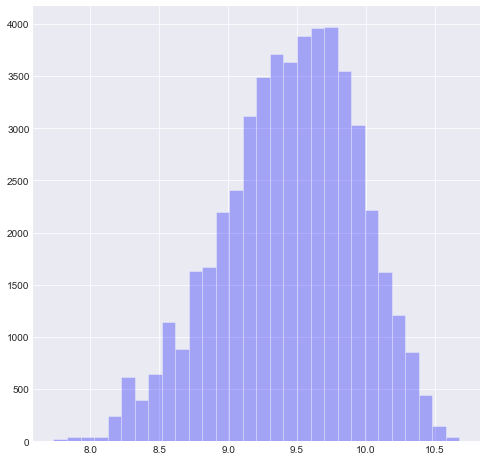

In [26]:
# train feature
Cls_Prepro.Log_transform(train_new, 'Reco_Policy_Premium')

### 5.7 Feature Engineering - Encoding Categorical Features:

- In this section we will apply some transformations to features so that the model perform can be improved.

#### 5.7.1 Response coding the 'Region_Code' feature

- we will apply target encoding for 'Region_Code' feature since it contains thousands of distinct values.

In [27]:
train_df_final = Cls_Prepro.get_response_coded_feature_df(train_new, train_new, 'Region_Code', 'Response', alpha = 1, target_label_iterator = [0,1])
train_df_final

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Region_Code_0,Region_Code_1
0,1,C3,3213,Rented,Individual,36,36,No,X1,15.0,3.0,22,9.361257,0,0.607143,0.392857
1,2,C5,1117,Owned,Joint,75,22,No,X2,1.0,3.0,22,10.325843,0,0.594595,0.405405
2,3,C5,3732,Owned,Individual,32,32,No,X1,1.0,1.0,19,8.916104,1,0.592593,0.407407
3,4,C24,4378,Owned,Joint,52,48,No,X1,15.0,3.0,19,9.785886,0,0.520000,0.480000
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,9.250042,0,0.645161,0.354839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50877,50878,C4,845,Rented,Individual,22,22,No,X3,1.0,3.0,18,8.949625,0,0.657895,0.342105
50878,50879,C5,4188,Rented,Individual,27,27,No,X3,7.0,3.0,4,8.595820,0,0.576923,0.423077
50879,50880,C1,442,Rented,Individual,63,63,No,X2,15.0,1.0,12,9.339173,0,0.625000,0.375000
50880,50881,C1,4,Owned,Joint,71,49,No,X2,2.0,2.0,16,10.246375,1,0.741935,0.258065


#### 5.7.2 Drop the 'ID' , 'Region_Code'  and 'City_Code' columns

- **'ID'** : we can drop the 'ID' column as it is merely a unique row ID for the data.
- **'Region_Code'** : we can drop the 'Region_Code' column since we have already response coded the same feature into the 'Region_Code_0' and 'Region_Code_1'.
- **'City_Code'** : we have dropped 'City_Code' because of too many categories. this will be not be an issue since we have alrady included the response coded 'Region_Code' feature which adds more of a ground level information about the location/region. 

In [28]:
train_df_final = train_df_final.drop(labels = ['ID','Region_Code','City_Code'], axis=1)
train_df_final.columns.values

array(['Accomodation_Type', 'Reco_Insurance_Type', 'Upper_Age',
       'Lower_Age', 'Is_Spouse', 'Health Indicator',
       'Holding_Policy_Duration', 'Holding_Policy_Type',
       'Reco_Policy_Cat', 'Reco_Policy_Premium', 'Response',
       'Region_Code_0', 'Region_Code_1'], dtype=object)

#### 5.7.3 Applying One-Hot encoding for all the remaining categorical features

- **'Holding_Policy_Duration'** : This is an ordinal feature with an inherent order involved for policy durations (in years). We will not encode this categorical feature.
- **'Accomodation_Type','Reco_Insurance_Type','Is_Spouse','Health Indicator','Holding_Policy_Type','Reco_Policy_Cat'** : We will one-hot encode these categorical features since all the categories are nominal with no inherent order among themselves.

In [29]:
train_df_final = pd.get_dummies(data=train_df_final,
                                columns=['Accomodation_Type','Reco_Insurance_Type','Is_Spouse','Health Indicator','Holding_Policy_Type','Reco_Policy_Cat'],
                                prefix=['Accomodation','Reco_Insurance','Spouse','Health','Holding_Policy','Reco_Policy']) 

#### 5.7.4 Closer look at the train dataset

In [30]:
# train data
len(list(train_df_final.select_dtypes(exclude='number')))

0

##### Observation:

- we can observe no categorical feature is present in the train dataset post feature encoding

In [31]:
print("Number of columns in train post feature encoding:", len(train_df_final.columns.values))
print("=="*50)
train_df_final.head()

Number of columns in train post feature encoding: 48


,Upper_Age,Lower_Age,Holding_Policy_Duration,Reco_Policy_Premium,Response,Region_Code_0,Region_Code_1,Accomodation_Owned,Accomodation_Rented,Reco_Insurance_Individual,...,Reco_Policy_13,Reco_Policy_14,Reco_Policy_15,Reco_Policy_16,Reco_Policy_17,Reco_Policy_18,Reco_Policy_19,Reco_Policy_20,Reco_Policy_21,Reco_Policy_22
0,36,36,15.0,9.361257,0,0.607143,0.392857,0,1,1,...,0,0,0,0,0,0,0,0,0,1
1,75,22,1.0,10.325843,0,0.594595,0.405405,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,32,32,1.0,8.916104,1,0.592593,0.407407,1,0,1,...,0,0,0,0,0,0,1,0,0,0
3,52,48,15.0,9.785886,0,0.520000,0.480000,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,44,44,3.0,9.250042,0,0.645161,0.354839,0,1,1,...,0,0,0,1,0,0,0,0,0,0


### 5.8 Train_Test_Split:

- We will split the train dataset into the Train and Cross-Validation set with **70/30 split ratio** for train/cv.
- We will not split the test dataset here.

In [32]:
# input and target dataframes for model building.
X_inp = train_df_final.drop(labels = ['Response'], axis=1)   
y_op = train_df_final.Response

In [33]:
#check the shape of input and target features
X_inp.shape, y_op.shape

((50882, 47), (50882,))

In [34]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X_inp, y_op,test_size=0.30,random_state=42,stratify=y_op)

In [35]:
#check the shape of train and test features
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((35617, 47), (15265, 47), (35617,), (15265,))

#### List of the features:-

- We will use this list of independent features for further analysis

In [36]:
feature_list = list(X_inp.columns.values)
print(feature_list)

['Upper_Age', 'Lower_Age', 'Holding_Policy_Duration', 'Reco_Policy_Premium', 'Region_Code_0', 'Region_Code_1', 'Accomodation_Owned', 'Accomodation_Rented', 'Reco_Insurance_Individual', 'Reco_Insurance_Joint', 'Spouse_No', 'Spouse_Yes', 'Health_X1', 'Health_X2', 'Health_X3', 'Health_X4', 'Health_X5', 'Health_X6', 'Health_X7', 'Health_X8', 'Health_X9', 'Holding_Policy_1.0', 'Holding_Policy_2.0', 'Holding_Policy_3.0', 'Holding_Policy_4.0', 'Reco_Policy_1', 'Reco_Policy_2', 'Reco_Policy_3', 'Reco_Policy_4', 'Reco_Policy_5', 'Reco_Policy_6', 'Reco_Policy_7', 'Reco_Policy_8', 'Reco_Policy_9', 'Reco_Policy_10', 'Reco_Policy_11', 'Reco_Policy_12', 'Reco_Policy_13', 'Reco_Policy_14', 'Reco_Policy_15', 'Reco_Policy_16', 'Reco_Policy_17', 'Reco_Policy_18', 'Reco_Policy_19', 'Reco_Policy_20', 'Reco_Policy_21', 'Reco_Policy_22']


# 6. Defining a baseline using a Random Model

- Here we define a baseline as **'auc_score'** using a random model. We will use this baseline **'auc_score'** as a benchmark for comparing different statistical models.

### 6.1 Defining Methods for Model Building and Evaluation:-

In [37]:
# Creating a single Generic Class for model fitting, prediction, evaluation and hyperparameter tuning.
# defining static methods enables using them across the notebook without creating class instance.

class Modelling_and_Evaluation:

    @staticmethod
    def generate_random_model_probs(x_in, no_of_target_classes = 2):
        """
        This function returns the randomly simulated probabilities for defining a baseline for model comparision
        """
        # no. of rows of the X_train data
        x_samples = x_in.shape[0]

        # create an output array of probabilities that has exactly same size as the input train data
        x_random_probs = np.zeros(shape=(x_samples,no_of_target_classes))

        # generate randomly simulated probabilities
        for i in range(x_samples):
            rand_probabs = np.random.rand(1,no_of_target_classes)

            # this will ensure the sum of the randomly generated probabilities will be equal to 1 for both the classes
            x_random_probs[i] = (rand_probabs/np.sum(rand_probabs))[0]

        ##print(x_random_probs)

        return x_random_probs


    @staticmethod
    def model_fit(model, x_in, y_in):
        """
        This function is used to fit the input data to base model
        """
        model.fit(x_in, y_in)
        return model
    

    @staticmethod
    def model_fit_and_calibrate(model, x_in, y_in):
        """
        This function is used to fit and calibrate base input model
        """
        model.fit(x_in, y_in)
        cal_model = CalibratedClassifierCV(base_estimator=model, method='sigmoid', cv=5)
        cal_model.fit(x_in, y_in)
        return cal_model
    

    @staticmethod
    def model_predict(model, x_out):
        """
        This function is used to predict class labels and class probabilities
        """
        pred_labels = model.predict(x_out)
        pred_probs = model.predict_proba(x_out)
        return pred_labels, pred_probs
    
    
    @staticmethod
    def convert_probs_to_labels(prob_predictions, threshold):
        """
        This function is used to convert the predicted probabilites to class values based on the threshold
        """
        predicted_labels = (prob_predictions >= threshold).astype(int)
        return predicted_labels
    
    
    @staticmethod
    def tune_hyperparameters(pipeline, parameters_grid, scoring_param, X_in, y_in, X_out, y_out, search_mode = 'grid_searchCV', refit_param = True, folds = 5, n_iter = 10):
        """
        This function is used to tune the hyperparameters of a base model using GridSearchCV and RandomizedSearchCV
        """

        start_time = time.time()

        kfolds = StratifiedKFold(n_splits=folds, shuffle=True, random_state=42)

        if search_mode == 'grid_searchCV':
            Search_model = GridSearchCV(estimator = pipeline, 
                                        param_grid = parameters_grid, 
                                        scoring = scoring_param,
                                        cv = kfolds, 
                                        refit = refit_param, 
                                        return_train_score = False,
                                        n_jobs = -1, verbose = 2)
            Search_model.fit(X_in, y_in)

        elif search_mode == 'randomized_searchCV':
            Search_model = RandomizedSearchCV(estimator = pipeline, 
                                              param_distributions = parameters_grid, 
                                              scoring = scoring_param,
                                              cv = kfolds,
                                              n_iter = n_iter,
                                              refit = refit_param, 
                                              return_train_score = False, 
                                              n_jobs = -1, verbose = 2, random_state = 42)
            Search_model.fit(X_in, y_in)

        else:
            print("Search method not provided. Please input either 'grid_searchCV' or 'randomized_searchCV'.")
            return
        
        best_estimator = Search_model.best_estimator_
        cv_score = cross_val_score(Search_model.best_estimator_, X_in, y_in, cv=5)
        results_df = pd.DataFrame(Search_model.cv_results_)
        
        print("=="*50)
        print("Hyper-Parameter Tuning Results:", end="\n")
        print("Best Estimator Model:", best_estimator)
        print("=="*50)
        print("Best parameters for the Best Estimator Model: ", Search_model.best_params_)
        print("=="*50)
        print("Score for the Best Estimator Model: ", Search_model.best_score_)
        print("=="*50)
        print("Cross-validation Score for the Best Estimator Model: ", cv_score.mean())
        print("=="*50)
        print("Test Score on Best Estimator: ", best_estimator.score(X_out, y_out))
        print("=="*50)
        print("Time elapsed: ", time.time() - start_time, " seconds.")
        print("=="*50)
        print("Parameter combinations evaluated: ",results_df.shape[0])

        return Search_model, best_estimator, results_df
    
    
    @staticmethod
    def get_metrics(y_true, y_labels, y_probs):
        """
        This function returns the model evaluation metrics like confusion matrix, accuracy, precision, recall, F1-score and log-loss 
        for a trained model predicted class labels
        """

        accuracy = round(accuracy_score(y_true,y_labels), 3)
        precision = round(precision_score(y_true,y_labels), 3)
        recall = round(recall_score(y_true,y_labels), 3)
        f1 = round(f1_score(y_true,y_labels), 3)
        Lg_Loss = round(log_loss(y_true,y_probs), 3)

        print("Confusion Matrix :\n\n", confusion_matrix(y_true,y_labels))
        print("=="*50)
        print("Classification Report :\n\n",classification_report(y_true,y_labels,labels=[0,1]))
        print("=="*50)
        print("Accuracy : {:.3f}".format(accuracy), end="\n")
        print("Precision : {:.3f}".format(precision), end="\n")
        print("Recall : {:.3f}".format(recall), end="\n")
        print("F1_score : {:.3f}".format(f1), end="\n")
        print("Log_Loss : {:.3f}".format(Lg_Loss))

        return accuracy, precision, recall, f1, Lg_Loss
    

    @staticmethod
    def get_auc_score_and_plot_roc_auc_curve(y_true, y_probs, model_nm):
        """
        This function returns the auc_score and plots the ROC curve for the trained model predicted class probabilites
        """

        auc_score = round(roc_auc_score(y_true, y_probs[:,1]), 3)
        print("AUC score for {} = {:.3f}".format(model_nm, auc_score))

        fpr, tpr, _ = roc_curve(y_true=y_true, y_score=y_probs[:,1], pos_label=1)

        #random probabilities for auc=0.5 curve
        random_probs = [0 for i in range(len(y_true))]
        rndm_fpr, rndm_tpr, _ = roc_curve(y_true=y_true, y_score=random_probs, pos_label=1)

        #plot roc curve
        plt.figure(figsize=(8,6))
        plt.plot(rndm_fpr,rndm_tpr, linestyle = '--', color = 'b', label =  'AUC = 0.5')
        plt.plot(fpr,tpr, linestyle = '--', color = 'r', label = str(model_nm) + '(AUC = %0.3f)' %(auc_score))
        plt.legend()
        plt.title("ROC curve for " + str(model_nm) + " with AUC = %0.3f" %(auc_score))
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.show()
        
        return auc_score


# Creating an instnace of the class
Cls_Mod = Modelling_and_Evaluation()    

### 6.2 Create a dataframe for storing results

In [38]:
#del(Result_df)
Result_df = pd.DataFrame(columns = ['Model','AUC','Precision','Recall','F1-score','Log_Loss','Accuracy', 'Execution_Time'])

### 6.3 Prediction using random model

- In random model we simulate 2 class probabilites (for class 0 and 1) randomly such that they sum to 1. 

Confusion Matrix :

 [[5755 5847]
 [1829 1834]]
Classification Report :

               precision    recall  f1-score   support

           0       0.76      0.50      0.60     11602
           1       0.24      0.50      0.32      3663

    accuracy                           0.50     15265
   macro avg       0.50      0.50      0.46     15265
weighted avg       0.63      0.50      0.53     15265

Accuracy : 0.497
Precision : 0.239
Recall : 0.501
F1_score : 0.323
Log_Loss : 0.877
AUC score for Random Model = 0.501


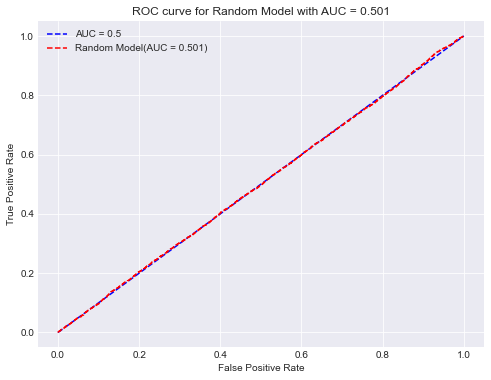

In [39]:
# no. of classes in target data
no_of_target_classes = train_df.nunique(axis=0)['Response']

# generate randomly simulated probabilities
random_model_probs = Cls_Mod.generate_random_model_probs(X_test,no_of_target_classes)


# generate random class labels from simulated probability scores - we extract the actual output class label array 
# based on the index values corresponding to maximum probability value for each row in the "random_model_probs" array.

#random_model_labels = Cls_Mod.convert_probs_to_labels(random_model_probs, 0.5)[:,1]
random_model_labels = np.argmax(random_model_probs, axis=1)

print("=="*50)

# random model evaluation
accuracy_randm, precision_randm, recall_randm, f1_randm, Lg_Loss_randm = Cls_Mod.get_metrics(y_test, random_model_labels, random_model_probs)
print("=="*50)
# we will use these randomly simulated probabilites for predicting the 'auc_score' by comparing the with actual class labels
auc_score_randm = Cls_Mod.get_auc_score_and_plot_roc_auc_curve(y_test, random_model_probs, 'Random Model')

#### Save the results of Random model

In [40]:
Result_df = Result_df.append({'Model': 'Random', 
                              'AUC' : auc_score_randm,
                              'Precision': precision_randm, 
                              'Recall': recall_randm,
                              'F1-score': f1_randm,
                              'Log_Loss' : Lg_Loss_randm,
                              'Accuracy': accuracy_randm,
                              'Execution_Time' : "--" }, ignore_index = True)
Result_df

,Model,AUC,Precision,Recall,F1-score,Log_Loss,Accuracy,Execution_Time
0,Random,0.501,0.239,0.501,0.323,0.877,0.497,--


#### **Observations:**

- As expected Random model has predicted the auc score of around 0.5 which indicates that the random model is not perfomring good enough and not able to distinguish between Positive and Negative class points. 
- That means either this random model is predicting random class or constant class for all the data points.
- We will use this auc score of around 0.5 as baseline for comparing different statistical models.

# 7. Model Building and Evaluation using Statistical Models

- In this section, we will build statistical models using different estimators and analyze their results by comparing with Random model score.

## 7.1 K-NN

#### K-NN with default parameters and 'distance' base weights for prediction

In [43]:
#del(knn)

Confusion Matrix :

 [[10270  1332]
 [ 3091   572]]
Classification Report :

               precision    recall  f1-score   support

           0       0.77      0.89      0.82     11602
           1       0.30      0.16      0.21      3663

    accuracy                           0.71     15265
   macro avg       0.53      0.52      0.51     15265
weighted avg       0.66      0.71      0.67     15265

Accuracy : 0.710
Precision : 0.300
Recall : 0.156
F1_score : 0.205
Log_Loss : 2.296
AUC score for K-Nearest Neighbors Classifier = 0.547


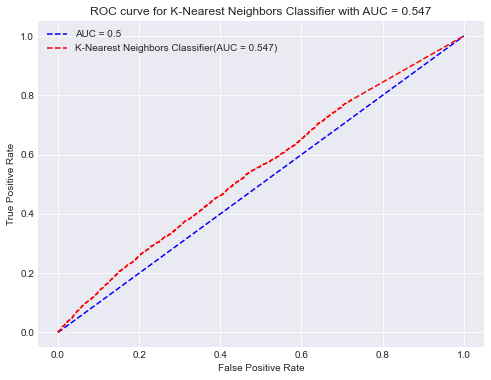

In [44]:
# initialize the model
knn = KNeighborsClassifier(n_neighbors=5, weights='distance', n_jobs =-1)

start_time = time.clock()

# model training
model_knn = Cls_Mod.model_fit(knn, X_train, y_train)

# model prediction
test_pred, test_probs = Cls_Mod.model_predict(model_knn, X_test)

# compute execution time
run_time_knn = time.clock() - start_time
print("Execution time :", run_time_knn)

# model evaluation - get the metrics and plot the results
print("=="*50)
accuracy_knn, precision_knn, recall_knn, f1_knn, Lg_Loss_knn  = Cls_Mod.get_metrics(y_test, test_pred, test_probs)
print("=="*50)
auc_knn = Cls_Mod.get_auc_score_and_plot_roc_auc_curve(y_test, test_probs, 'K-Nearest Neighbors Classifier')

#### **Save the results of KNN model**

In [45]:
Result_df = Result_df.append({'Model': 'K-Nearest Neighbors', 
                              'AUC' : auc_knn,
                              'Precision': precision_knn, 
                              'Recall': recall_knn,
                              'F1-score': f1_knn,
                              'Log_Loss' : Lg_Loss_knn,
                              'Accuracy': accuracy_knn, 
                              'Execution_Time' : run_time_knn}, ignore_index = True)
Result_df

,Model,AUC,Precision,Recall,F1-score,Log_Loss,Accuracy,Execution_Time
0,Random,0.501,0.239,0.501,0.323,0.877,0.497,--
1,K-Nearest Neighbors,0.547,0.300,0.156,0.205,2.296,0.710,76.232311


## 7.2 Multinomial Naive Bayes

In [46]:
#del(mnb)

Confusion Matrix :

 [[11560    42]
 [ 3627    36]]
Classification Report :

               precision    recall  f1-score   support

           0       0.76      1.00      0.86     11602
           1       0.46      0.01      0.02      3663

    accuracy                           0.76     15265
   macro avg       0.61      0.50      0.44     15265
weighted avg       0.69      0.76      0.66     15265

Accuracy : 0.760
Precision : 0.462
Recall : 0.010
F1_score : 0.019
Log_Loss : 0.529
AUC score for Multinomial Naive Bayes = 0.619


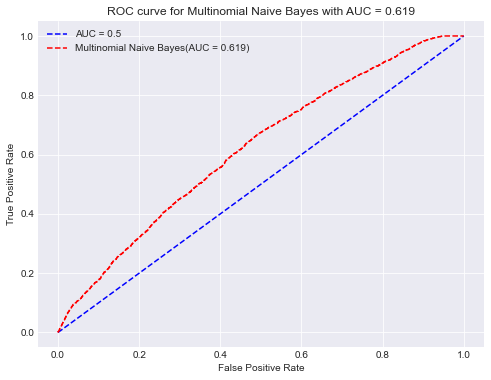

In [47]:
# initialize the model with default parameters
mnb = MultinomialNB(alpha=1.0, fit_prior=True)

start_time = time.clock()

# model training
model_mnb = Cls_Mod.model_fit(mnb,X_train, y_train)

# model prediction
test_pred, test_probs = Cls_Mod.model_predict(model_mnb, X_test)

# compute execution time
run_time_mnb = time.clock() - start_time
print("Execution time :", run_time_mnb)

# model evaluation - get the metrics and plot the results
print("=="*50)
accuracy_mnb, precision_mnb, recall_mnb, f1_mnb, Lg_Loss_mnb = Cls_Mod.get_metrics(y_test, test_pred, test_probs)
print("=="*50)
auc_mnb = Cls_Mod.get_auc_score_and_plot_roc_auc_curve(y_test, test_probs, 'Multinomial Naive Bayes')

#### **Save the results of MNB model**

In [48]:
Result_df = Result_df.append({'Model': 'Multinomial Naive Bayes', 
                              'AUC' : auc_mnb,
                              'Precision': precision_mnb, 
                              'Recall': recall_mnb,
                              'F1-score': f1_mnb,
                              'Log_Loss' : Lg_Loss_mnb,
                              'Accuracy': accuracy_mnb,
                              'Execution_Time' : run_time_mnb}, ignore_index = True)
Result_df

,Model,AUC,Precision,Recall,F1-score,Log_Loss,Accuracy,Execution_Time
0,Random,0.501,0.239,0.501,0.323,0.877,0.497,--
1,K-Nearest Neighbors,0.547,0.300,0.156,0.205,2.296,0.710,76.232311
2,Multinomial Naive Bayes,0.619,0.462,0.010,0.019,0.529,0.760,0.22176


## 7.3 Gaussian Naive Bayes

In [49]:
#del(gnb)

Confusion Matrix :

 [[3707 7895]
 [ 568 3095]]
Classification Report :

               precision    recall  f1-score   support

           0       0.87      0.32      0.47     11602
           1       0.28      0.84      0.42      3663

    accuracy                           0.45     15265
   macro avg       0.57      0.58      0.44     15265
weighted avg       0.73      0.45      0.46     15265

Accuracy : 0.446
Precision : 0.282
Recall : 0.845
F1_score : 0.422
Log_Loss : 2.199
AUC score for Gaussian Naive Bayes = 0.652


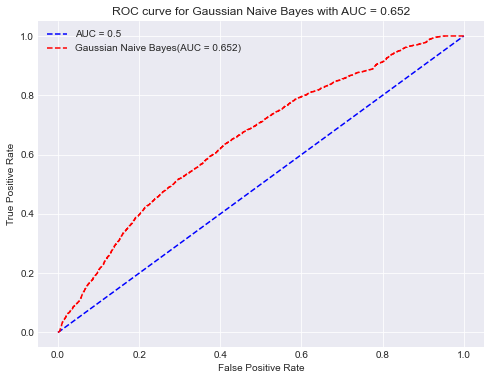

In [50]:
# initialize the model
gnb = GaussianNB()

start_time = time.clock()

# model training
model_gnb = Cls_Mod.model_fit(gnb,X_train, y_train)

# model prediction
test_pred, test_probs = Cls_Mod.model_predict(model_gnb, X_test)

# compute execution time
run_time_gnb = time.clock() - start_time
print("Execution time :", run_time_gnb)

# model evaluation - get the metrics and plot the results
print("=="*50)
accuracy_gnb, precision_gnb, recall_gnb, f1_gnb, Lg_Loss_gnb = Cls_Mod.get_metrics(y_test, test_pred, test_probs)
print("=="*50)
auc_gnb = Cls_Mod.get_auc_score_and_plot_roc_auc_curve(y_test, test_probs, 'Gaussian Naive Bayes')

#### Save the results of GNB model

In [51]:
Result_df = Result_df.append({'Model': 'Gaussian Naive Bayes', 
                              'AUC' : auc_gnb,
                              'Precision': precision_gnb, 
                              'Recall': recall_gnb,
                              'F1-score': f1_gnb,
                              'Log_Loss' : Lg_Loss_gnb,
                              'Accuracy': accuracy_gnb,
                              'Execution_Time' : run_time_gnb}, ignore_index = True)
Result_df

,Model,AUC,Precision,Recall,F1-score,Log_Loss,Accuracy,Execution_Time
0,Random,0.501,0.239,0.501,0.323,0.877,0.497,--
1,K-Nearest Neighbors,0.547,0.300,0.156,0.205,2.296,0.710,76.232311
2,Multinomial Naive Bayes,0.619,0.462,0.010,0.019,0.529,0.760,0.22176
3,Gaussian Naive Bayes,0.652,0.282,0.845,0.422,2.199,0.446,0.151116


## 7.4 Support Vector Machine (SVM) Classifier

In [52]:
#del(svmc)

Confusion Matrix :

 [[5674 5928]
 [1502 2161]]
Classification Report :

               precision    recall  f1-score   support

           0       0.79      0.49      0.60     11602
           1       0.27      0.59      0.37      3663

    accuracy                           0.51     15265
   macro avg       0.53      0.54      0.49     15265
weighted avg       0.67      0.51      0.55     15265

Accuracy : 0.513
Precision : 0.267
Recall : 0.590
F1_score : 0.368
Log_Loss : 0.547
AUC score for SVM Classifier = 0.558


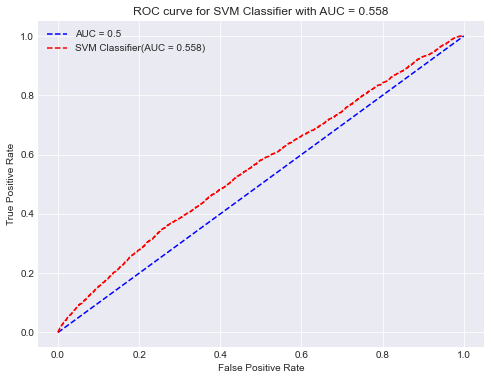

In [53]:
# initialize the model with default parameters, balanced 'class_weights' and enabled probability estimates
svmc = SVC(C=1.0,kernel='rbf',class_weight='balanced',random_state=42,probability=True)

start_time = time.clock()

# model training
if os.path.isfile('SVC_model.pkl'):
    # Load the saved SVM model from file
    model_svmc = joblib.load('SVC_model.pkl')
else:
    model_svmc = Cls_Mod.model_fit(svmc,X_train,y_train)
    # Save the trained SVM model as a pickle in a file.
    joblib.dump(model_svmc, 'SVC_model.pkl')


# model prediction
test_pred, test_probs = Cls_Mod.model_predict(model_svmc, X_test)

# compute execution time
run_time_svmc = time.clock() - start_time
print("Execution time :", run_time_svmc)

# model evaluation - get the metrics and plot the results
print("=="*50)
accuracy_svmc, precision_svmc, recall_svmc, f1_svmc, Lg_Loss_svmc = Cls_Mod.get_metrics(y_test, test_pred, test_probs)
print("=="*50)
auc_svmc = Cls_Mod.get_auc_score_and_plot_roc_auc_curve(y_test, test_probs, 'SVM Classifier')

#### Save the results of SVM model

In [54]:
Result_df = Result_df.append({'Model': 'SVM', 
                              'AUC' : auc_svmc,
                              'Precision': precision_svmc, 
                              'Recall': recall_svmc,
                              'F1-score': f1_svmc,
                              'Log_Loss' : Lg_Loss_svmc,
                              'Accuracy': accuracy_svmc,
                              'Execution_Time' : run_time_svmc}, ignore_index = True)
Result_df

,Model,AUC,Precision,Recall,F1-score,Log_Loss,Accuracy,Execution_Time
0,Random,0.501,0.239,0.501,0.323,0.877,0.497,--
1,K-Nearest Neighbors,0.547,0.300,0.156,0.205,2.296,0.710,76.232311
2,Multinomial Naive Bayes,0.619,0.462,0.010,0.019,0.529,0.760,0.22176
3,Gaussian Naive Bayes,0.652,0.282,0.845,0.422,2.199,0.446,0.151116
4,SVM,0.558,0.267,0.590,0.368,0.547,0.513,241.280178


## 7.5 Logistic Regression

In [55]:
#del(LoR)

Confusion Matrix :

 [[6853 4749]
 [1226 2437]]
Classification Report :

               precision    recall  f1-score   support

           0       0.85      0.59      0.70     11602
           1       0.34      0.67      0.45      3663

    accuracy                           0.61     15265
   macro avg       0.59      0.63      0.57     15265
weighted avg       0.73      0.61      0.64     15265

Accuracy : 0.609
Precision : 0.339
Recall : 0.665
F1_score : 0.449
Log_Loss : 0.638
AUC score for Logistic Regression Classifier = 0.681


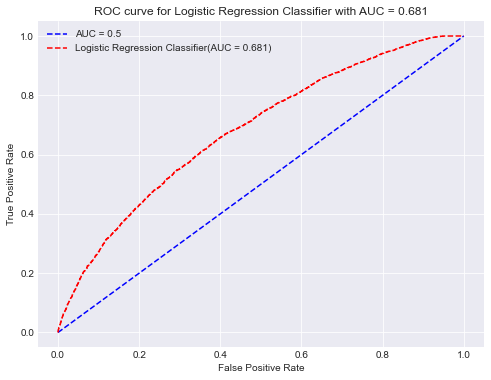

In [56]:
# initialize the model with default parameters and 'balanced' 'class_weights'
LoR = LogisticRegression(penalty='l2', C=1.0, class_weight='balanced', random_state=42, n_jobs=-1)

start_time = time.clock()

# model training
model_LoR = Cls_Mod.model_fit(LoR, X_train, y_train)

# model prediction
test_pred, test_probs = Cls_Mod.model_predict(model_LoR, X_test)

# compute execution time
run_time_LoR = time.clock() - start_time
print("Execution time :", run_time_LoR)

# model evaluation - get the metrics and plot the results
print("=="*50)
accuracy_LoR, precision_LoR, recall_LoR, f1_LoR, Lg_Loss_LoR = Cls_Mod.get_metrics(y_test, test_pred, test_probs)
print("=="*50)
auc_LoR = Cls_Mod.get_auc_score_and_plot_roc_auc_curve(y_test, test_probs, 'Logistic Regression Classifier')

#### **Save the results of Logistic Regression model**

In [57]:
Result_df = Result_df.append({'Model': 'Logistic Regression', 
                              'AUC' : auc_LoR,
                              'Precision': precision_LoR, 
                              'Recall': recall_LoR,
                              'F1-score': f1_LoR,
                              'Log_Loss' : Lg_Loss_LoR,
                              'Accuracy': accuracy_LoR,
                              'Execution_Time' : run_time_LoR}, ignore_index = True)
Result_df

,Model,AUC,Precision,Recall,F1-score,Log_Loss,Accuracy,Execution_Time
0,Random,0.501,0.239,0.501,0.323,0.877,0.497,--
1,K-Nearest Neighbors,0.547,0.300,0.156,0.205,2.296,0.710,76.232311
2,Multinomial Naive Bayes,0.619,0.462,0.010,0.019,0.529,0.760,0.22176
3,Gaussian Naive Bayes,0.652,0.282,0.845,0.422,2.199,0.446,0.151116
4,SVM,0.558,0.267,0.590,0.368,0.547,0.513,241.280178
5,Logistic Regression,0.681,0.339,0.665,0.449,0.638,0.609,16.444535


## 7.6 Random Forest Classifier

In [58]:
#del(rf)

Confusion Matrix :

 [[11076   526]
 [ 3046   617]]
Classification Report :

               precision    recall  f1-score   support

           0       0.78      0.95      0.86     11602
           1       0.54      0.17      0.26      3663

    accuracy                           0.77     15265
   macro avg       0.66      0.56      0.56     15265
weighted avg       0.73      0.77      0.72     15265

Accuracy : 0.766
Precision : 0.540
Recall : 0.168
F1_score : 0.257
Log_Loss : 0.514
AUC score for Random Forest Classifier = 0.693


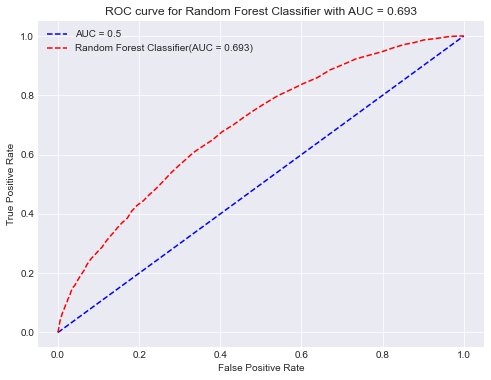

In [59]:
# initialize the model with default parameters and balanced 'class_weights'
rf = RandomForestClassifier(class_weight='balanced', bootstrap=True, random_state=42, n_jobs=-1)

start_time = time.clock()

# model training
model_rf = Cls_Mod.model_fit(rf, X_train, y_train)

# model prediction
test_pred, test_probs = Cls_Mod.model_predict(model_rf, X_test)

# compute execution time
run_time_rf = time.clock() - start_time
print("Execution time :", run_time_rf)

# model evaluation - get the metrics and plot the results
print("=="*50)
accuracy_rf, precision_rf, recall_rf, f1_rf, Lg_Loss_rf  = Cls_Mod.get_metrics(y_test, test_pred, test_probs)
print("=="*50)
auc_rf = Cls_Mod.get_auc_score_and_plot_roc_auc_curve(y_test, test_probs, 'Random Forest Classifier')

#### **Save the results of RF model**

In [60]:
Result_df = Result_df.append({'Model': 'Random Forest', 
                              'AUC' : auc_rf,
                              'Precision': precision_rf, 
                              'Recall': recall_rf,
                              'F1-score': f1_rf,
                              'Log_Loss' : Lg_Loss_rf,
                              'Accuracy': accuracy_rf,
                              'Execution_Time' : run_time_rf}, ignore_index = True)
Result_df

,Model,AUC,Precision,Recall,F1-score,Log_Loss,Accuracy,Execution_Time
0,Random,0.501,0.239,0.501,0.323,0.877,0.497,--
1,K-Nearest Neighbors,0.547,0.300,0.156,0.205,2.296,0.710,76.232311
2,Multinomial Naive Bayes,0.619,0.462,0.010,0.019,0.529,0.760,0.22176
3,Gaussian Naive Bayes,0.652,0.282,0.845,0.422,2.199,0.446,0.151116
4,SVM,0.558,0.267,0.590,0.368,0.547,0.513,241.280178
5,Logistic Regression,0.681,0.339,0.665,0.449,0.638,0.609,16.444535
6,Random Forest,0.693,0.540,0.168,0.257,0.514,0.766,4.499482


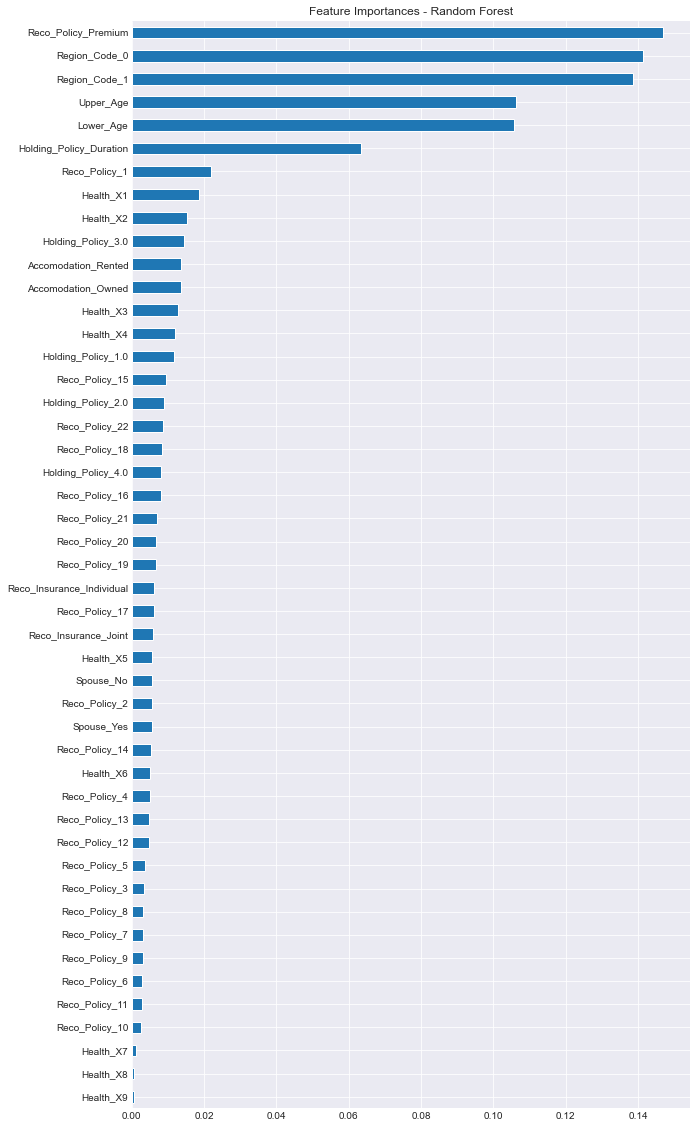

In [61]:
# Analyze the Important Features using Random Forest

feat_importances_rf = pd.Series(model_rf.feature_importances_, index = X_inp.columns)
#feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))
feat_importances_rf.sort_values().plot(kind='barh',figsize=(10,20))
plt.title('Feature Importances - Random Forest')
plt.show()

## 7.7 eXtreme Gradient Boosting (XGBoost)

In [62]:
#del(xgbst)

Confusion Matrix :

 [[11417   185]
 [ 3276   387]]
Classification Report :

               precision    recall  f1-score   support

           0       0.78      0.98      0.87     11602
           1       0.68      0.11      0.18      3663

    accuracy                           0.77     15265
   macro avg       0.73      0.54      0.53     15265
weighted avg       0.75      0.77      0.70     15265

Accuracy : 0.773
Precision : 0.677
Recall : 0.106
F1_score : 0.183
Log_Loss : 0.497
AUC score for XGBoost Classifier = 0.704


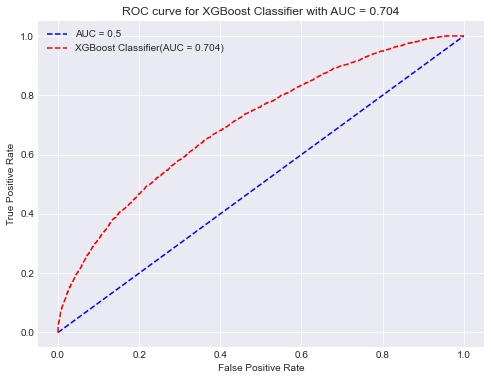

In [63]:
# initialize the model with default parameters
xgbst = xgb.XGBClassifier(objective='binary:logistic', booster='gbtree', random_state=42, n_jobs=-1)

start_time = time.clock()

# model training
model_xgbst = Cls_Mod.model_fit(xgbst, X_train, y_train)

# model prediction
test_pred, test_probs = Cls_Mod.model_predict(model_xgbst, X_test)

# compute execution time
run_time_xgbst = time.clock() - start_time
print("Execution time :", run_time_xgbst)

# model evaluation - get the metrics and plot the results
print("=="*50)
accuracy_xgbst, precision_xgbst, recall_xgbst, f1_xgbst, Lg_Loss_xgbst  = Cls_Mod.get_metrics(y_test, test_pred, test_probs)
print("=="*50)
auc_xgbst = Cls_Mod.get_auc_score_and_plot_roc_auc_curve(y_test, test_probs, 'XGBoost Classifier')

#### **Save the results of XGBoost model**

In [64]:
Result_df = Result_df.append({'Model': 'XGBoost', 
                              'AUC' : auc_xgbst,
                              'Precision': precision_xgbst, 
                              'Recall': recall_xgbst,
                              'F1-score': f1_xgbst,
                              'Log_Loss' : Lg_Loss_xgbst,
                              'Accuracy': accuracy_xgbst,
                              'Execution_Time' : run_time_xgbst}, ignore_index = True)
Result_df

,Model,AUC,Precision,Recall,F1-score,Log_Loss,Accuracy,Execution_Time
0,Random,0.501,0.239,0.501,0.323,0.877,0.497,--
1,K-Nearest Neighbors,0.547,0.300,0.156,0.205,2.296,0.710,76.232311
2,Multinomial Naive Bayes,0.619,0.462,0.010,0.019,0.529,0.760,0.22176
3,Gaussian Naive Bayes,0.652,0.282,0.845,0.422,2.199,0.446,0.151116
4,SVM,0.558,0.267,0.590,0.368,0.547,0.513,241.280178
5,Logistic Regression,0.681,0.339,0.665,0.449,0.638,0.609,16.444535
6,Random Forest,0.693,0.540,0.168,0.257,0.514,0.766,4.499482
7,XGBoost,0.704,0.677,0.106,0.183,0.497,0.773,2.565847


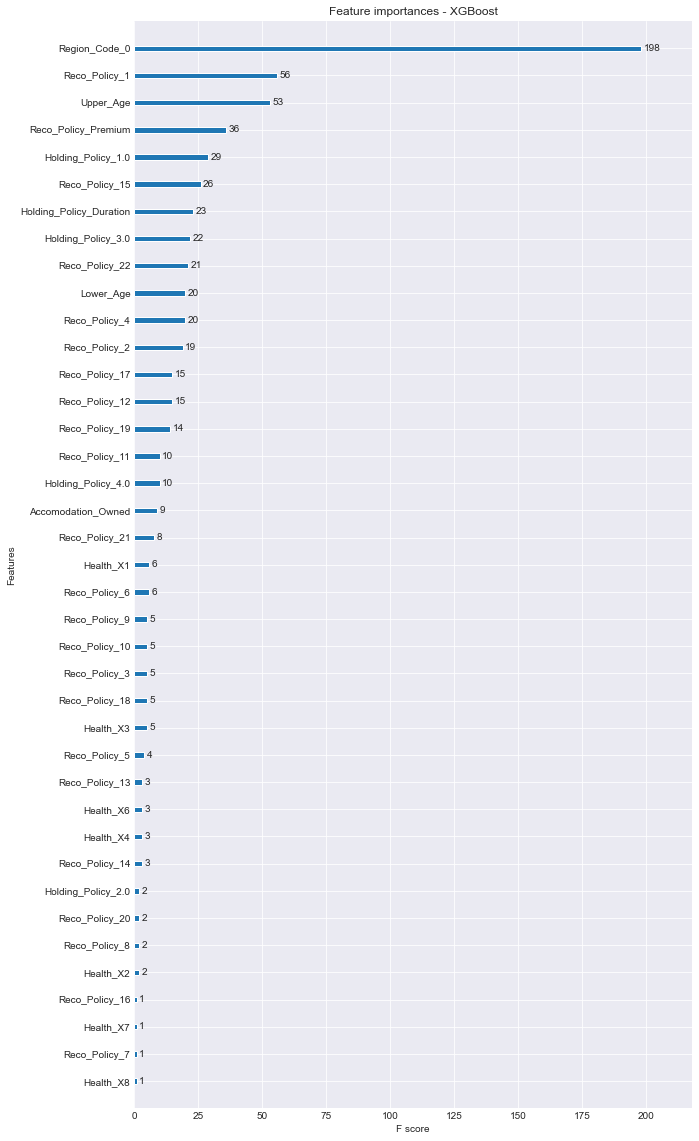

In [65]:
# Analyze the Feature Importances using XGBoost

fig, ax = plt.subplots(1,1,figsize=(10,20))
plot_importance(model_xgbst,ax=ax,title='Feature importances - XGBoost')
plt.show()

## 7.8 Light Gradient Boosting Machine (LGBM)

In [66]:
#del(lgb)

[LightGBM] [Warning] Unknown parameter: boosting_type1
Confusion Matrix :

 [[7715 3887]
 [1270 2393]]
Classification Report :

               precision    recall  f1-score   support

           0       0.86      0.66      0.75     11602
           1       0.38      0.65      0.48      3663

    accuracy                           0.66     15265
   macro avg       0.62      0.66      0.62     15265
weighted avg       0.74      0.66      0.69     15265

Accuracy : 0.662
Precision : 0.381
Recall : 0.653
F1_score : 0.481
Log_Loss : 0.595
AUC score for Light Gradient Boosting Machine = 0.727


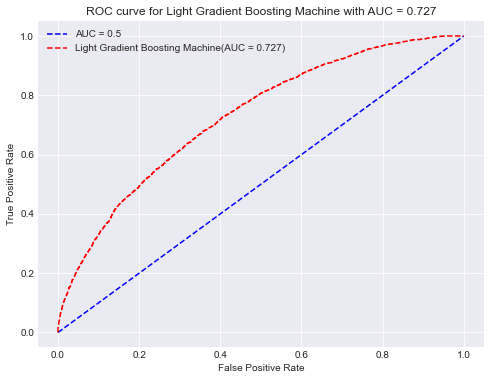

In [67]:
# initialize the model with default params with balanced class weights
lgb = lgbm.LGBMClassifier(boosting_type='gbdt', class_weight='balanced', random_state=42, n_jobs=-1)

start_time = time.clock()

# model training
model_lgb = Cls_Mod.model_fit(lgb, X_train, y_train)

# model prediction
test_pred, test_probs = Cls_Mod.model_predict(model_lgb, X_test)

# compute execution time
run_time_lgb = time.clock() - start_time
print("Execution time :", run_time_lgb)

# model evaluation - get the metrics and plot the results
print("=="*50)
accuracy_lgb, precision_lgb, recall_lgb, f1_lgb, Lg_Loss_lgb  = Cls_Mod.get_metrics(y_test, test_pred, test_probs)
print("=="*50)
auc_lgb = Cls_Mod.get_auc_score_and_plot_roc_auc_curve(y_test, test_probs, 'Light Gradient Boosting Machine')

#### **Save the results of LGBM model**

In [68]:
Result_df = Result_df.append({'Model': 'LGBM', 
                              'AUC' : auc_lgb,
                              'Precision': precision_lgb, 
                              'Recall': recall_lgb,
                              'F1-score': f1_lgb,
                              'Log_Loss' : Lg_Loss_lgb,
                              'Accuracy': accuracy_lgb,
                              'Execution_Time' : run_time_lgb}, ignore_index = True)
Result_df

,Model,AUC,Precision,Recall,F1-score,Log_Loss,Accuracy,Execution_Time
0,Random,0.501,0.239,0.501,0.323,0.877,0.497,--
1,K-Nearest Neighbors,0.547,0.300,0.156,0.205,2.296,0.710,76.232311
2,Multinomial Naive Bayes,0.619,0.462,0.010,0.019,0.529,0.760,0.22176
3,Gaussian Naive Bayes,0.652,0.282,0.845,0.422,2.199,0.446,0.151116
4,SVM,0.558,0.267,0.590,0.368,0.547,0.513,241.280178
5,Logistic Regression,0.681,0.339,0.665,0.449,0.638,0.609,16.444535
6,Random Forest,0.693,0.540,0.168,0.257,0.514,0.766,4.499482
7,XGBoost,0.704,0.677,0.106,0.183,0.497,0.773,2.565847
8,LGBM,0.727,0.381,0.653,0.481,0.595,0.662,1.067333


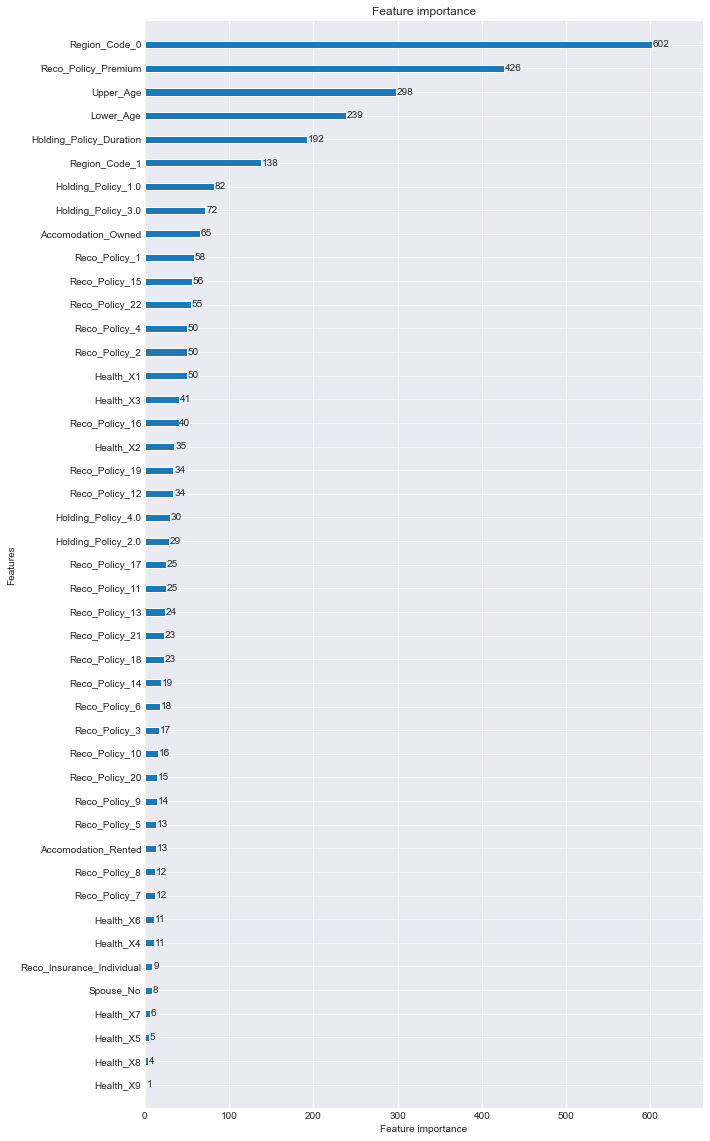

In [69]:
# Analyze the Important Features using LGBM

ax = lgbm.plot_importance(model_lgb, height=0.3, max_num_features=50, figsize=(10,20))
plt.show()

# 8. Summarizing Modelling Results  - Selecting the Best Model

- In this step, we will analyze the results produced by all the different models and finalize the best model for further analysis and improvement.

In [77]:
Result_df

,Model,AUC,Precision,Recall,F1-score,Log_Loss,Accuracy,Execution_Time
0,Random,0.501,0.239,0.501,0.323,0.877,0.497,--
1,K-Nearest Neighbors,0.547,0.300,0.156,0.205,2.296,0.710,76.232311
2,Multinomial Naive Bayes,0.619,0.462,0.010,0.019,0.529,0.760,0.22176
3,Gaussian Naive Bayes,0.652,0.282,0.845,0.422,2.199,0.446,0.151116
4,SVM,0.558,0.267,0.590,0.368,0.547,0.513,241.280178
5,Logistic Regression,0.681,0.339,0.665,0.449,0.638,0.609,16.444535
6,Random Forest,0.693,0.540,0.168,0.257,0.514,0.766,4.499482
7,XGBoost,0.704,0.677,0.106,0.183,0.497,0.773,2.565847
8,LGBM,0.727,0.381,0.653,0.481,0.595,0.662,1.067333


#### Observations:

As can be seen in the result table, I have compared 8 different statistical models with the 'random model' and recorded their results for comapring the overall performance. 
Below are some of the observations that can be made to summarize these results:-

1. For the basic setup with default parameters, we can observe that the tree-based non-linear models have outperformed compared to other models while calculating our baseline metric - **'auc_score'**.
2. The **AUC score is highest overall for LGBM (light gradient boosting model)** followed by XGBoost, Random-Forest and Logistic Regression
3. One interesting thing I have observed is that the Gaussian based Naive Bayes implementation has outperformed compared to the Multinomial based one. From this observation, we can make a conclusion that certain continuous valued numeric features has more significance while predicting results. We can confirm this hypothesis by analyzing the important features using tree-based models.
4. Clearly, the **execution time** is the least for the **LGBM**.
5. The **LGBM** model has **highest overall score in terms of AUC and F1-score with balanced Precision and Recall**. Thus the overall best approach seems to be **LGBM**.

Thus we can say that the combination of the correct algorithm with optimal hyperparameters and important features makes a lot of difference while calculating the results. 
So in the next steps we wil try to improve the performance the LGBM model.

# 9. Improving the performance of the Best Model 

- We will try to improve the performance of the **best model (LGBM)** using below approaches

1. **Feature Reduction :** Finding the important features and retraining the model on the reduced features set.
2. **Hyper parameter tuning :** Finding the optimal set of values for hyperparameters.

### 9.1 Feture Reduction :

- From the EDA, we have observed that some features are not as useful for predicting the insurance leads.
- In this section, we will analyze importance of all the features and try to reduce the number of features, which will lead to reduction of execution time, hopefully without significantly reducing the model performance.
- **Feature reduction is a trade-off between model performance and execution time.**

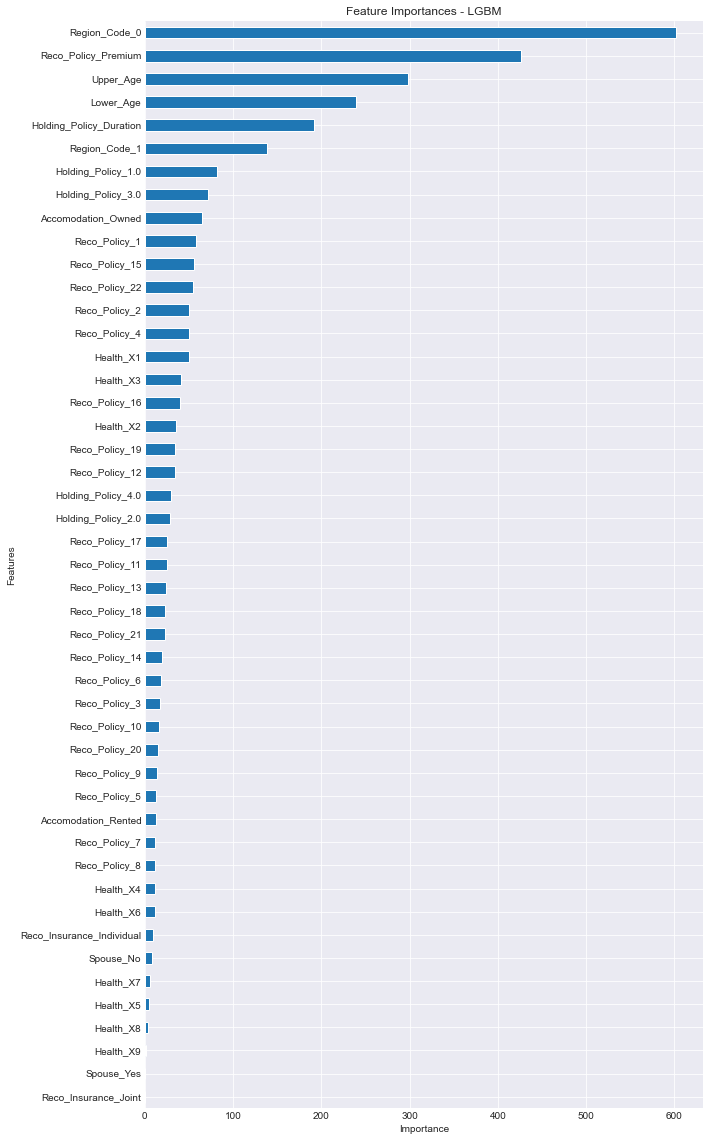

In [72]:
# plot the important features for lgbm

feat_importances_lgbm = pd.Series(model_lgb.feature_importances_, index = X_inp.columns)
#feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))
feat_importances_lgbm.sort_values().plot(kind='barh',figsize=(10,20))
plt.xlabel('Importance'); plt.ylabel('Features'); plt.title('Feature Importances - LGBM')
plt.show()

In [142]:
# Get numerical feature importances of LGBM model
importances_values = list(model_lgb.feature_importances_)

# normalize the feature importances values such they sum to 1
normalized_imp_values = [(val/sum(importances_values)) for val in importances_values]

# Creating a list of tuples with (variable, importance)
feature_importances = [(feature_name, round(importance_value, 2)) for feature_name, importance_value in zip(feature_list, normalized_imp_values)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Check the pairs of important features and their importances_values
[print('Variable: {:20} Importance: {}'.format(*fi_pair)) for fi_pair in feature_importances];

Variable: Region_Code_0        Importance: 0.2
Variable: Reco_Policy_Premium  Importance: 0.14
Variable: Upper_Age            Importance: 0.1
Variable: Lower_Age            Importance: 0.08
Variable: Holding_Policy_Duration Importance: 0.06
Variable: Region_Code_1        Importance: 0.05
Variable: Holding_Policy_1.0   Importance: 0.03
Variable: Accomodation_Owned   Importance: 0.02
Variable: Health_X1            Importance: 0.02
Variable: Holding_Policy_3.0   Importance: 0.02
Variable: Reco_Policy_1        Importance: 0.02
Variable: Reco_Policy_2        Importance: 0.02
Variable: Reco_Policy_4        Importance: 0.02
Variable: Reco_Policy_15       Importance: 0.02
Variable: Reco_Policy_22       Importance: 0.02
Variable: Health_X2            Importance: 0.01
Variable: Health_X3            Importance: 0.01
Variable: Holding_Policy_2.0   Importance: 0.01
Variable: Holding_Policy_4.0   Importance: 0.01
Variable: Reco_Policy_3        Importance: 0.01
Variable: Reco_Policy_6        Importan

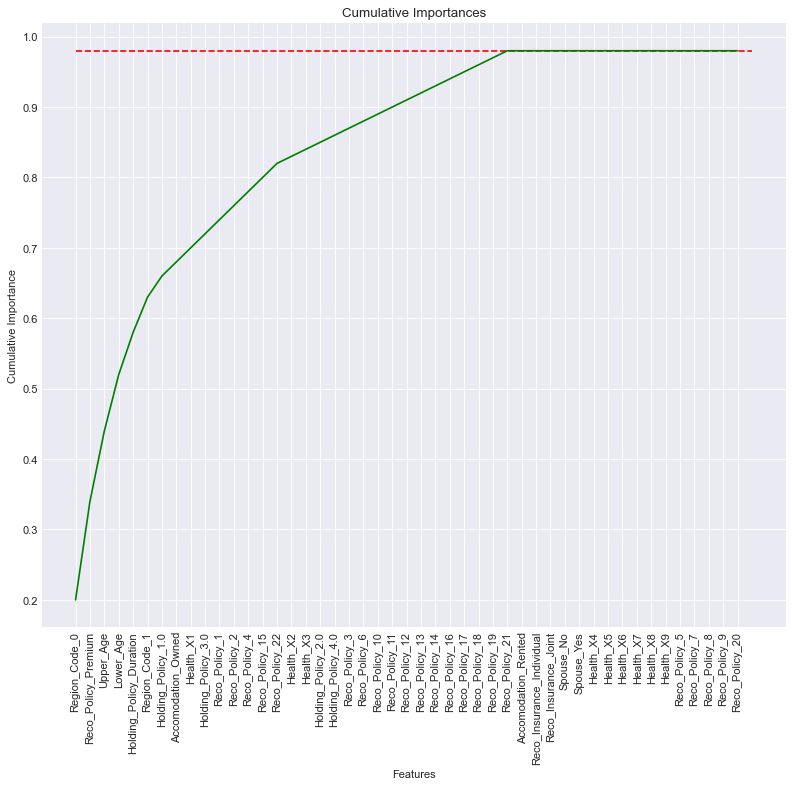

In [198]:
# List of features sorted from most to least important
sorted_features = [fi_pair[0] for fi_pair in feature_importances]
sorted_importances = [fi_pair[1] for fi_pair in feature_importances]

# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)

# list of x locations for plotting
x_values = list(range(len(importances_values)))

# Make a line graph
plt.figure(figsize=(12, 10), dpi=80)
plt.plot(x_values, cumulative_importances, 'g-')

# Draw line at 98% of importance retained
plt.hlines(y = 0.98, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')

# Format x ticks and labels
plt.xticks(x_values, sorted_features, rotation = 'vertical')

# Axis labels and title
plt.xlabel('Features'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');

In [199]:
# Find number of features for cumulative importance of 98%
# Add 1 because Python is zero-indexed
print('Number of features for 98% importance:', np.where(cumulative_importances > 0.98)[0][0] + 1)

Number of features for 98% importance: 31


In [200]:
# Extract the names of the most important features
important_feature_names = [feature[0] for feature in feature_importances[0:31]]
# Find the columns of the most important features
important_feature_indices = [feature_list.index(feature) for feature in important_feature_names]

# Create training and testing sets with only the important features
X_train_important = X_train.iloc[:, important_feature_indices]
X_test_important = X_test.iloc[:, important_feature_indices]

# Sanity check on operations
print('Important train features shape:', X_train_important.shape)
print('Important test features shape:', X_test_important.shape)

Important train features shape: (35617, 31)
Important test features shape: (15265, 31)


#### Train and Evaluate the GBM model with important (reduced) features

Execution time : 0.5653277000019443
Confusion Matrix :

 [[7759 3843]
 [1328 2335]]
Classification Report :

               precision    recall  f1-score   support

           0       0.85      0.67      0.75     11602
           1       0.38      0.64      0.47      3663

    accuracy                           0.66     15265
   macro avg       0.62      0.65      0.61     15265
weighted avg       0.74      0.66      0.68     15265

Accuracy : 0.661
Precision : 0.378
Recall : 0.637
F1_score : 0.475
Log_Loss : 0.598
AUC score for Light Gradient Boosting Machine with Feature Reduction = 0.723


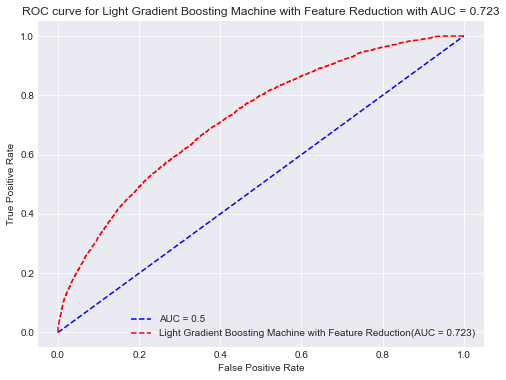

In [201]:
# initialize the model with default params with balanced class weights
lgb_imp_fea = lgbm.LGBMClassifier(boosting_type='gbdt', class_weight='balanced', random_state=42, n_jobs=-1)

start_time = time.clock()

# model training
model_imp_fea = Cls_Mod.model_fit(lgb_imp_fea, X_train_important, y_train)

# model prediction
test_pred, test_probs = Cls_Mod.model_predict(model_imp_fea, X_test_important)

# compute execution time
run_time_lgb_imp_fea = time.clock() - start_time
print("Execution time :", run_time_lgb_imp_fea)

# model evaluation - get the metrics and plot the results
print("=="*50)
accuracy_lgb_imp_fea, precision_lgb_imp_fea, recall_lgb_imp_fea, f1_lgb_imp_fea, Lg_Loss_lgb_imp_fea  = Cls_Mod.get_metrics(y_test, test_pred, test_probs)
print("=="*50)
auc_lgb_imp_fea = Cls_Mod.get_auc_score_and_plot_roc_auc_curve(y_test, test_probs, 'Light Gradient Boosting Machine with Feature Reduction')

In [215]:
Result_df = Result_df.append({'Model': 'LGBM_Reduced Features', 
                              'AUC' : auc_lgb_imp_fea,
                              'Precision': precision_lgb_imp_fea, 
                              'Recall': recall_lgb_imp_fea,
                              'F1-score': f1_lgb_imp_fea,
                              'Log_Loss' : Lg_Loss_lgb_imp_fea,
                              'Accuracy': accuracy_lgb_imp_fea,
                              'Execution_Time' : run_time_lgb_imp_fea}, ignore_index = True)

#### Comparing the Best Model - LGBM with and without Feature Reduction

In [219]:
Result_df.iloc[8:]

,Model,AUC,Precision,Recall,F1-score,Log_Loss,Accuracy,Execution_Time
8,LGBM,0.727,0.381,0.653,0.481,0.595,0.662,1.067333
9,LGBM_Reduced Features,0.723,0.378,0.637,0.475,0.598,0.661,0.565328


### Conclusion:
- We can clearly see that, reducing the features from 47 to 31 has drastically improved the execution speed by almost half the time, at the cost of marginal reduction in the model performance (i.e. AUC).

In [220]:
#Result_df.drop([9],inplace=True)
#Result_df.set_index(Result_df.index)

### 9.2 Hyper parameters tuning of the LGBM model using Randomized Search and Grid Search:

##### Creating Hyperparameters Grid for LGBM model

In [93]:
# Using Pipeline for creating  estimator object for Random Forest
pipe = Pipeline([('lgb_clf', lgb)])

# Number of trees in random forest
n_estimators = list(np.linspace(200,2000,10).astype(int))

# Maximum number of levels in tree
max_depth = list(np.linspace(10,100,10).astype(int))
max_depth.append(None)

# Minimum number of data points required to split an internal node
min_samples_split = [2, 5, 10]

# Minimum number of data points required to be at a leaf node
min_samples_leaf = [1, 2, 3, 4, 5]

# Number of features to consider at each split
max_features = ['sqrt','log2']


# Create the grid parameter search 
params_CVSearch = dict(lgb_clf__n_estimators = n_estimators, 
                       lgb_clf__max_depth = max_depth, 
                       lgb_clf__min_samples_split = min_samples_split, 
                       lgb_clf__min_samples_leaf = min_samples_leaf, 
                       lgb_clf__max_features = max_features)

# Check the parameter grid
print(params_CVSearch)

# Defining scoring_parameter 
scoring_parameters = 'roc_auc'


{'rf_clf__n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'rf_clf__max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None], 'rf_clf__min_samples_split': [2, 5, 10], 'rf_clf__min_samples_leaf': [1, 2, 3, 4, 5], 'rf_clf__max_features': ['sqrt', 'log2']}
{'accuracy_score': 'accuracy', 'precision_score': 'precision', 'recall_score': 'recall', 'f1_score': 'f1', 'auc_score': 'roc_auc'}


In [221]:
# from sklearn import metrics 
# (metrics.SCORERS.keys())

In [ ]:
# Hyper parameter tuning using GridSearchCV

best_Grid_Search_model, best_grid_estimator, GridResults_df = Cls.tune_hyperparameters(pipeline = pipe, 
                                                                                       parameters_grid = params_CVSearch, 
                                                                                       scoring_param = scoring_parameters, 
                                                                                       X_in = X_inp, y_in = y_op, X_out = X_cv, y_out = y_cv, 
                                                                                       search_mode = 'grid_searchCV', 
                                                                                       refit_param='auc_score')


# Save the best GridSearch hyper parameter tuned LGBM model as a pickle in a file. 
joblib.dump(best_Search_model_Grid, 'Best_Grid_LGBM_Model.pkl') 
  
# Load the saved model from file
Grid_RF_from_joblib = joblib.load('Best_Grid_LGBM_Model.pkl') 

Fitting 10 folds for each of 3300 candidates, totalling 33000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 12.4min


In [ ]:
# Hyper parameter tuning using RandomizedSearchCV

best_Search_model_random, best_random_estimator, RandomResults_df = Cls.tune_hyperparameters(pipeline = pipe, 
                                                                                             parameters_grid = params_CVSearch, 
                                                                                             scoring_param = scoring_parameters, 
                                                                                             X_in = X_inp, y_in = y_op, X_out = X_cv, y_out = y_cv, 
                                                                                             search_mode = 'randomized_searchCV', 
                                                                                             refit_param='auc_score')


# Save the best RandomSearch hyper parameter tuned LGBM model as a pickle in a file. 
joblib.dump(best_Search_model_random, 'Best_Random_LGBM_Model.pkl') 
  
# Load the saved model from file
Random_RF_from_joblib = joblib.load('Best_Random_LGBM_Model.pkl')